# Mid-Bootcamp Project: Predicting the selling Price of houses


## Importing Libraries <a class="anchor" id="1"></a>

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from statsmodels.formula.api import ols

from scipy import stats

from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

import Functions as funct

import pickle

import warnings
warnings.filterwarnings('ignore')

#pd.set_option('max_row', None)

## Load Data <a class="anchor" id="2"></a>

In [2]:
df = pd.read_csv('data/regression_data.csv')

## Data cleaning and wrangling <a class="anchor" id="3"></a>

### Explore Data

In [3]:
df.head()

id      date  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
0  7129300520  10/13/14         3       1.00         1180      5650     1.0   
1  6414100192   12/9/14         3       2.25         2570      7242     2.0   
2  5631500400   2/25/15         2       1.00          770     10000     1.0   
3  2487200875   12/9/14         4       3.00         1960      5000     1.0   
4  1954400510   2/18/15         3       2.00         1680      8080     1.0   

   waterfront  view  condition  ...  sqft_above  sqft_basement  yr_built  \
0           0     0          3  ...        1180              0      1955   
1           0     0          3  ...        2170            400      1951   
2           0     0          3  ...         770              0      1933   
3           0     0          5  ...        1050            910      1965   
4           0     0          3  ...        1680              0      1987   

   yr_renovated  zipcode      lat     long  sqft_living15  sqft_lot15   price  
0             0    98178  47.5112 -122.257           1340        5650  221900  
1          1991    98125  47.7210 -122.319           1690        7639  538000  
2             0    98028  47.7379 -122.233           2720        8062  180000  
3             0    98136  47.5208 -122.393           1360        5000  604000  
4             0    98074  47.6168 -122.045           1800        7503  510000  

[5 rows x 21 columns]

In [4]:
df.shape

(21597, 21)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   bedrooms       21597 non-null  int64  
 3   bathrooms      21597 non-null  float64
 4   sqft_living    21597 non-null  int64  
 5   sqft_lot       21597 non-null  int64  
 6   floors         21597 non-null  float64
 7   waterfront     21597 non-null  int64  
 8   view           21597 non-null  int64  
 9   condition      21597 non-null  int64  
 10  grade          21597 non-null  int64  
 11  sqft_above     21597 non-null  int64  
 12  sqft_basement  21597 non-null  int64  
 13  yr_built       21597 non-null  int64  
 14  yr_renovated   21597 non-null  int64  
 15  zipcode        21597 non-null  int64  
 16  lat            21597 non-null  float64
 17  long           21597 non-null  float64
 18  sqft_l

### Standardize header names (not ncessary in this case)

In [6]:
df.columns = [column.lower().replace(' ','_') for column in df.columns]

### Check unique values in columns (value counts)

In [7]:
for col in df.select_dtypes(['int64','float64','object']):
    print(df[col].value_counts(), '\n')

795000620     3
1568100300    2
2892700041    2
1450100390    2
3395040550    2
             ..
2595650170    1
7212651100    1
9808700025    1
6772200055    1
2424410110    1
Name: id, Length: 21420, dtype: int64 

6/23/14    142
6/26/14    131
6/25/14    131
7/8/14     127
4/27/15    126
          ... 
11/2/14      1
1/31/15      1
5/15/15      1
5/27/15      1
1/10/15      1
Name: date, Length: 372, dtype: int64 

3     9824
4     6882
2     2760
5     1601
6      272
1      196
7       38
8       13
9        6
10       3
33       1
11       1
Name: bedrooms, dtype: int64 

2.50    5377
1.00    3851
1.75    3048
2.25    2047
2.00    1930
1.50    1445
2.75    1185
3.00     753
3.50     731
3.25     589
3.75     155
4.00     136
4.50     100
4.25      79
0.75      71
4.75      23
5.00      21
5.25      13
5.50      10
1.25       9
6.00       6
5.75       4
0.50       4
6.25       2
8.00       2
6.75       2
6.50       2
7.75       1
7.50       1
Name: bathrooms, dtype: int64 

1300   

### Check & remove duplicates in id column and set id column as index

#### Check unique values in id column

In [8]:
pd.Series(df["id"]).is_unique

False

- ID column contains duplicates. remove them to set id as index int he following.

#### Check out duplicates in id column

In [9]:
duplicateRowsDF = df[df.duplicated(['id'],keep=False)]
duplicateRowsDF

id      date  bedrooms  bathrooms  sqft_living  sqft_lot  \
93     6021501535   7/25/14         3       1.50         1580      5000   
94     6021501535  12/23/14         3       1.50         1580      5000   
313    4139480200   6/18/14         4       3.25         4290     12103   
314    4139480200   12/9/14         4       3.25         4290     12103   
324    7520000520    9/5/14         2       1.00         1240     12092   
...           ...       ...       ...        ...          ...       ...   
20654  8564860270   3/30/15         4       2.50         2680      5539   
20763  6300000226   6/26/14         4       1.00         1200      2171   
20764  6300000226    5/4/15         4       1.00         1200      2171   
21564  7853420110   10/3/14         3       3.00         2780      6000   
21565  7853420110    5/4/15         3       3.00         2780      6000   

       floors  waterfront  view  condition  ...  sqft_above  sqft_basement  \
93        1.0           0     0          3  ...        1290            290   
94        1.0           0     0          3  ...        1290            290   
313       1.0           0     3          3  ...        2690           1600   
314       1.0           0     3          3  ...        2690           1600   
324       1.0           0     0          3  ...         960            280   
...       ...         ...   ...        ...  ...         ...            ...   
20654     2.0           0     0          3  ...        2680              0   
20763     1.5           0     0          3  ...        1200              0   
20764     1.5           0     0          3  ...        1200              0   
21564     2.0           0     0          3  ...        2780              0   
21565     2.0           0     0          3  ...        2780              0   

       yr_built  yr_renovated  zipcode      lat     long  sqft_living15  \
93         1939             0    98117  47.6870 -122.386           1570   
94         1939             0    98117  47.6870 -122.386           1570   
313        1997             0    98006  47.5503 -122.102           3860   
314        1997             0    98006  47.5503 -122.102           3860   
324        1922          1984    98146  47.4957 -122.352           1820   
...         ...           ...      ...      ...      ...            ...   
20654      2013             0    98045  47.4759 -121.734           2680   
20763      1933             0    98133  47.7076 -122.342           1130   
20764      1933             0    98133  47.7076 -122.342           1130   
21564      2013             0    98065  47.5184 -121.886           2850   
21565      2013             0    98065  47.5184 -121.886           2850   

       sqft_lot15    price  
93           4500   430000  
94           4500   700000  
313         11244  1380000  
314         11244  1400000  
324          7460   232000  
...           ...      ...  
20654        5992   502000  
20763        1598   240000  
20764        1598   380000  
21564        6000   594866  
21565        6000   625000  

[353 rows x 21 columns]

In [10]:
#check with random example if all duplicates are selected above:
df.loc[df['id'] == 6021501535]

id      date  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
93  6021501535   7/25/14         3        1.5         1580      5000     1.0   
94  6021501535  12/23/14         3        1.5         1580      5000     1.0   

    waterfront  view  condition  ...  sqft_above  sqft_basement  yr_built  \
93           0     0          3  ...        1290            290      1939   
94           0     0          3  ...        1290            290      1939   

    yr_renovated  zipcode     lat     long  sqft_living15  sqft_lot15   price  
93             0    98117  47.687 -122.386           1570        4500  430000  
94             0    98117  47.687 -122.386           1570        4500  700000  

[2 rows x 21 columns]

#### Remove duplicates in id column

In [11]:
df.drop_duplicates(subset="id",keep='first',inplace=True)

In [12]:
#check if duplicates are removed
pd.Series(df["id"]).is_unique

True

In [13]:
df.shape

(21420, 21)

- Columns before removal of duplicates: 21597
- Columns after removal of duplicates: 21420 -> *lost 177 rows.*

Although duplicated rows contain unique data, I decided to delete them as these are only a few rows.  

#### Set id as index 

In [14]:
df.set_index('id')

date  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
id                                                                         
7129300520  10/13/14         3       1.00         1180      5650     1.0   
6414100192   12/9/14         3       2.25         2570      7242     2.0   
5631500400   2/25/15         2       1.00          770     10000     1.0   
2487200875   12/9/14         4       3.00         1960      5000     1.0   
1954400510   2/18/15         3       2.00         1680      8080     1.0   
...              ...       ...        ...          ...       ...     ...   
263000018    5/21/14         3       2.50         1530      1131     3.0   
6600060120   2/23/15         4       2.50         2310      5813     2.0   
1523300141   6/23/14         2       0.75         1020      1350     2.0   
291310100    1/16/15         3       2.50         1600      2388     2.0   
1523300157  10/15/14         2       0.75         1020      1076     2.0   

            waterfront  view  condition  grade  sqft_above  sqft_basement  \
id                                                                          
7129300520           0     0          3      7        1180              0   
6414100192           0     0          3      7        2170            400   
5631500400           0     0          3      6         770              0   
2487200875           0     0          5      7        1050            910   
1954400510           0     0          3      8        1680              0   
...                ...   ...        ...    ...         ...            ...   
263000018            0     0          3      8        1530              0   
6600060120           0     0          3      8        2310              0   
1523300141           0     0          3      7        1020              0   
291310100            0     0          3      8        1600              0   
1523300157           0     0          3      7        1020              0   

            yr_built  yr_renovated  zipcode      lat     long  sqft_living15  \
id                                                                             
7129300520      1955             0    98178  47.5112 -122.257           1340   
6414100192      1951          1991    98125  47.7210 -122.319           1690   
5631500400      1933             0    98028  47.7379 -122.233           2720   
2487200875      1965             0    98136  47.5208 -122.393           1360   
1954400510      1987             0    98074  47.6168 -122.045           1800   
...              ...           ...      ...      ...      ...            ...   
263000018       2009             0    98103  47.6993 -122.346           1530   
6600060120      2014             0    98146  47.5107 -122.362           1830   
1523300141      2009             0    98144  47.5944 -122.299           1020   
291310100       2004             0    98027  47.5345 -122.069           1410   
1523300157      2008             0    98144  47.5941 -122.299           1020   

            sqft_lot15   price  
id                              
7129300520        5650  221900  
6414100192        7639  538000  
5631500400        8062  180000  
2487200875        5000  604000  
1954400510        7503  510000  
...                ...     ...  
263000018         1509  360000  
6600060120        7200  400000  
1523300141        2007  402101  
291310100         1287  400000  
1523300157        1357  325000  

[21420 rows x 20 columns]

### Check null values in columns

In [15]:
#Columns including nulls
IncludingNulls = df.columns[df.isna().any()]
IncludingNulls

Index([], dtype='object')

In [16]:
#Columns with absolute number of nulls
df.isna().sum()

id               0
date             0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
price            0
dtype: int64

In [17]:
# Columns with percentage of null values
nulls = pd.DataFrame(df.isna().sum()*100/len(df), columns=['percentage'])
nulls.sort_values('percentage', ascending = False)

percentage
id                    0.0
sqft_above            0.0
sqft_lot15            0.0
sqft_living15         0.0
long                  0.0
lat                   0.0
zipcode               0.0
yr_renovated          0.0
yr_built              0.0
sqft_basement         0.0
grade                 0.0
date                  0.0
condition             0.0
view                  0.0
waterfront            0.0
floors                0.0
sqft_lot              0.0
sqft_living           0.0
bathrooms             0.0
bedrooms              0.0
price                 0.0

- No Null values in any column.

### Convert date variable into datetime format

In [18]:
funct.convert_data_types(df, 'date', incolumns=['date'])
funct.convert_data_types(df, 'yr_built', incolumns=['yr_built'])
funct.convert_data_types(df, 'yr_renovated', incolumns=['yr_renovated'])

Idea:
Check value 0 in yr_renovated -> Renovated no, yes
Bucket yr_built, in old, medium, new?

### Differentiate between categorical, discrete and continous values

In [19]:
funct.sort_variables(df)

Disrete columns: Index(['bedrooms', 'bathrooms', 'floors', 'waterfront', 'view', 'condition',
       'grade'],
      dtype='object')
Continuous Columns: Index(['id', 'date', 'sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement',
       'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15',
       'sqft_lot15', 'price'],
      dtype='object')
Categorical Columns: Index([], dtype='object')


There are no categorical columns, We could keep all variables as numericals as all of them include some kind of order. But it could be an idea to convert the discrete variables "grade","condition","view", 'bedrooms', 'bathrooms', 'floors', 'waterfront' to categorcial ones. 
Eventhough Zipcode has 70 unique values it might also make sense to convert it into categorical, as the variable does not contain an order.

### Deal with outliers

#### Visually look for outliers

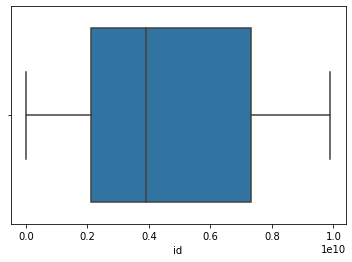

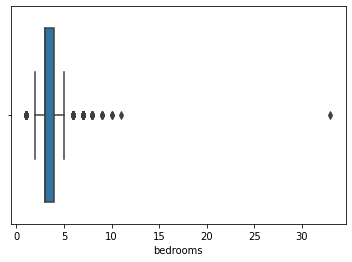

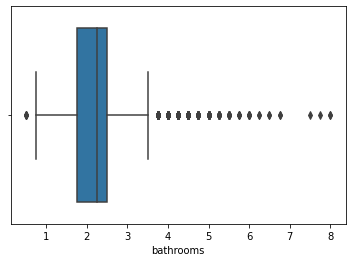

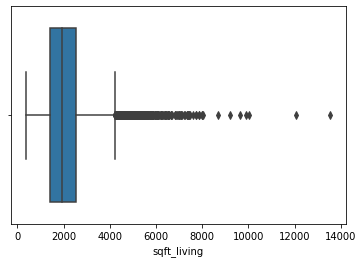

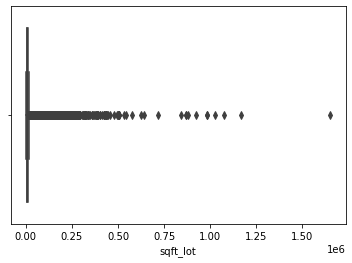

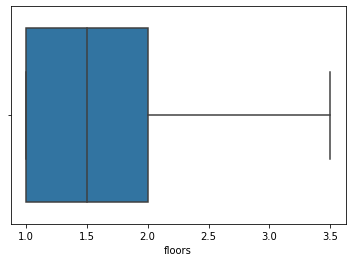

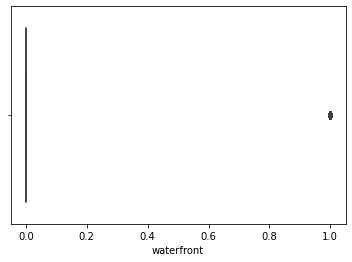

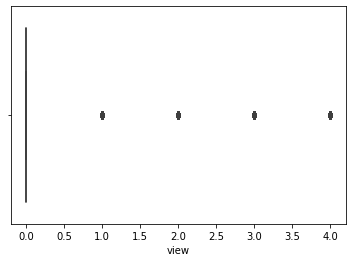

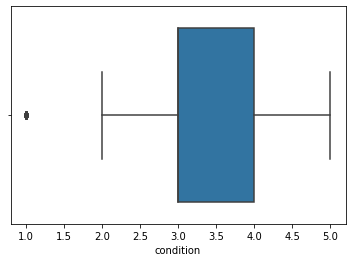

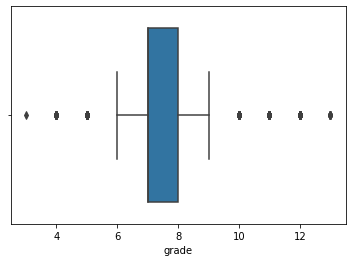

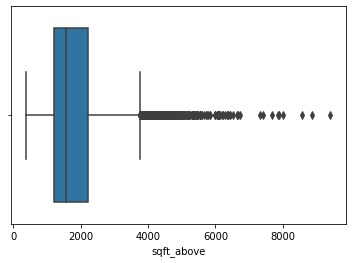

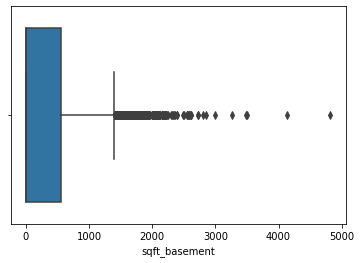

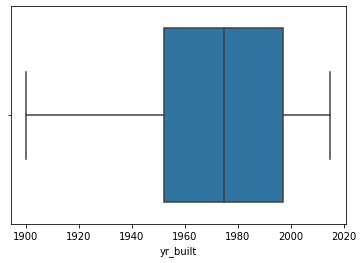

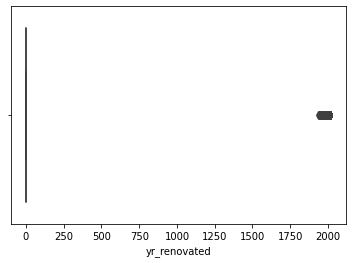

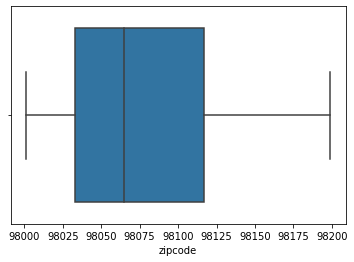

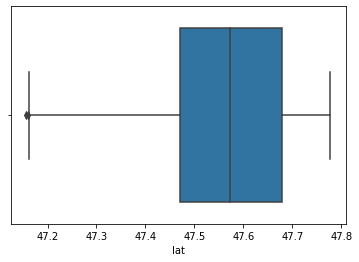

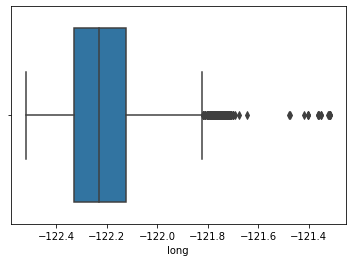

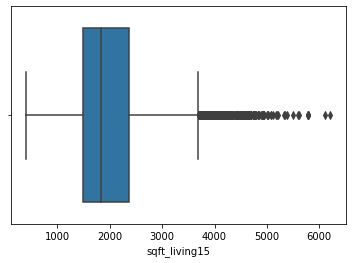

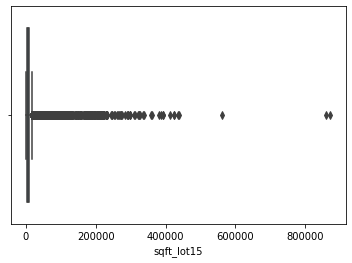

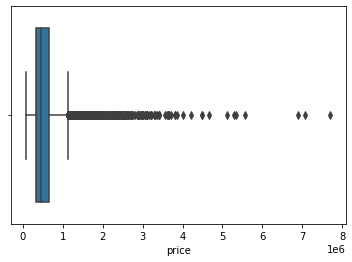

In [20]:
for cols in df.select_dtypes(np.number):
    sns.boxplot(df[cols])
    plt.show()

#### Cap outliers in continous variables (threshold: 1.5) and save in new df_outl

In [21]:
df_outl = df.copy()

In [22]:
df_outl=funct.cap_outliers(df_outl, threshold=1.5, in_columns=['sqft_living', 'sqft_lot','sqft_above',
       'sqft_basement', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'price'], skip_columns=['id','zipcode',"grade","condition","view", 'bedrooms', 'bathrooms', 'floors', 'waterfront'])

Variables capped: sqft_living
Variables capped: sqft_lot
Variables capped: sqft_above
Variables capped: sqft_basement
Variables capped: lat
Variables capped: long
Variables capped: sqft_living15
Variables capped: sqft_lot15
Variables capped: price


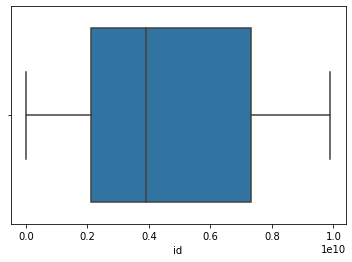

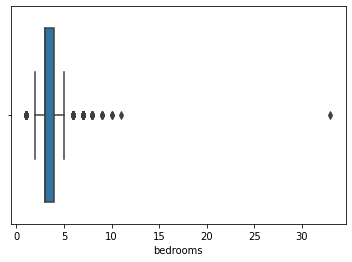

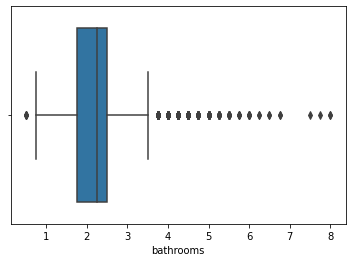

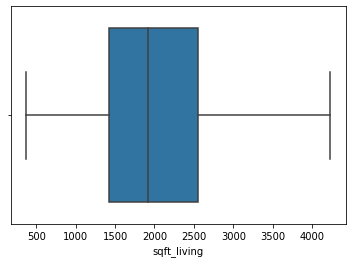

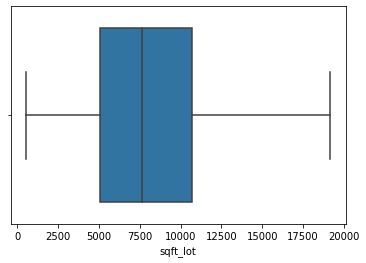

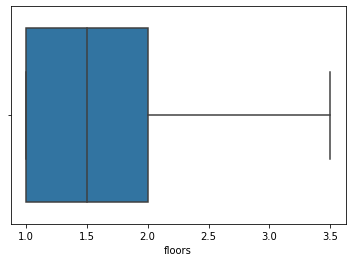

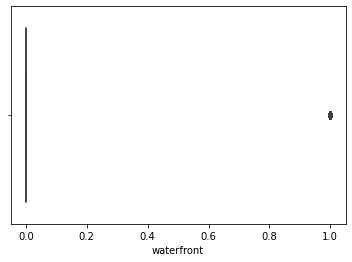

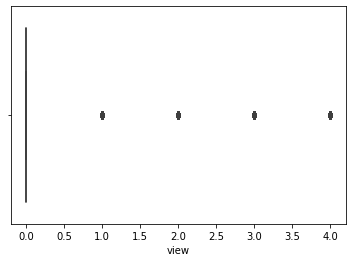

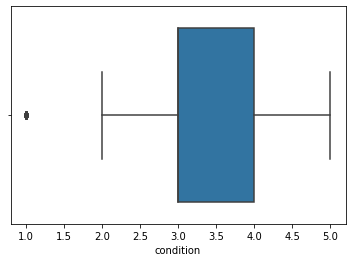

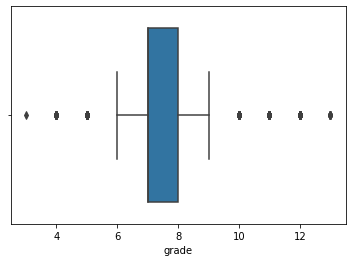

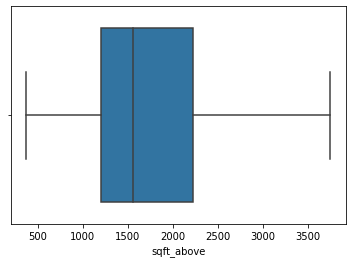

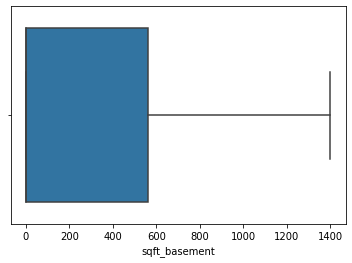

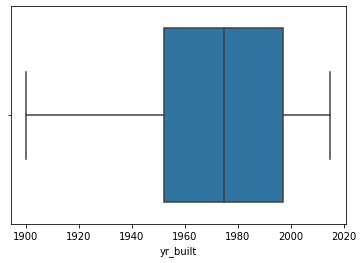

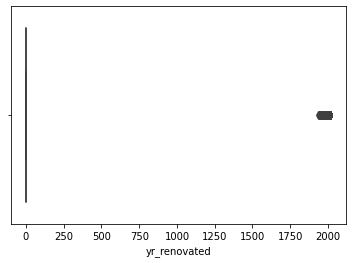

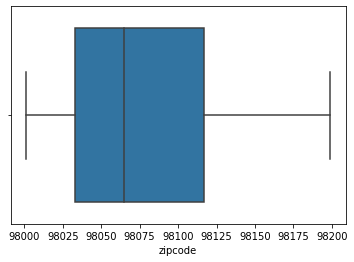

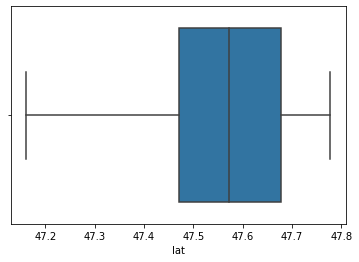

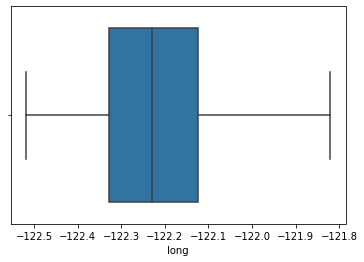

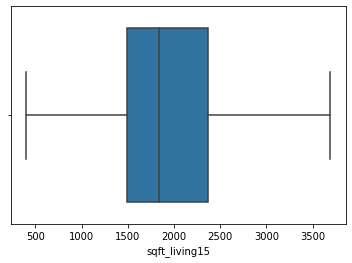

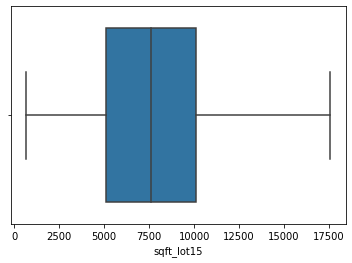

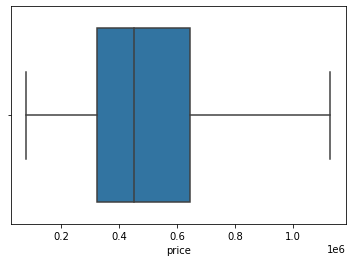

In [23]:
#Check
for cols in df_outl.select_dtypes(np.number):
    sns.boxplot(df_outl[cols])
    plt.show()

## Preprocessing of Data

In [24]:
#make copy for that trial: 
df_pro = df_outl.copy()
df_pro.columns

Index(['id', 'date', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'price'],
      dtype='object')

### Categorical data

#### Convert columns in df_pro into "object" 

In [25]:
funct.convert_data_types(df_pro, 'object', incolumns=['grade','zipcode','condition','view', 'bedrooms', 'bathrooms', 'floors', 'waterfront'])

#### Save categorical data in new df_cat

In [26]:
df_cat = pd.DataFrame(df_pro.select_dtypes(np.object))
df_cat.describe()

bedrooms  bathrooms   floors  waterfront   view  condition  grade  \
count      21420    21420.0  21420.0       21420  21420      21420  21420   
unique        12       29.0      6.0           2      5          5     11   
top            3        2.5      1.0           0      0          3      7   
freq        9731     5352.0  10552.0       21257  19306      13900   8889   

        zipcode  
count     21420  
unique       70  
top       98103  
freq        600

#### Show categoricals in plot

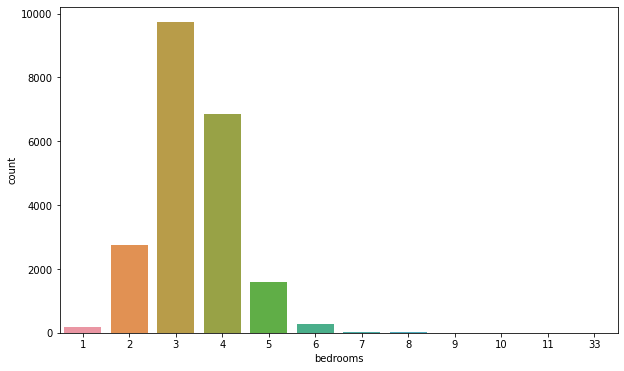

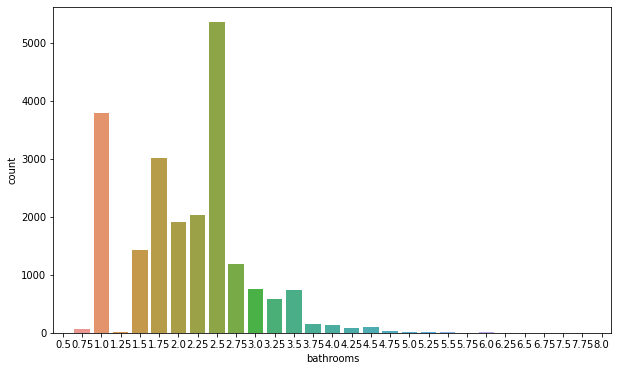

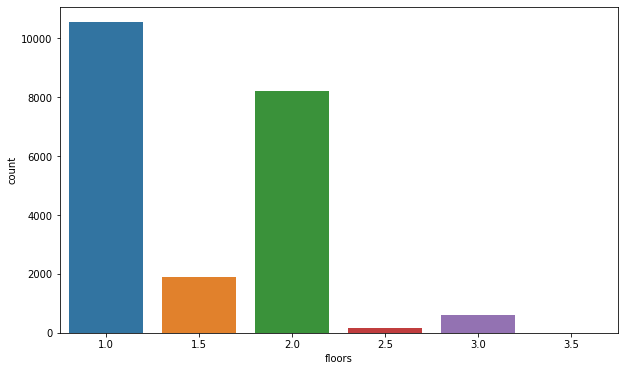

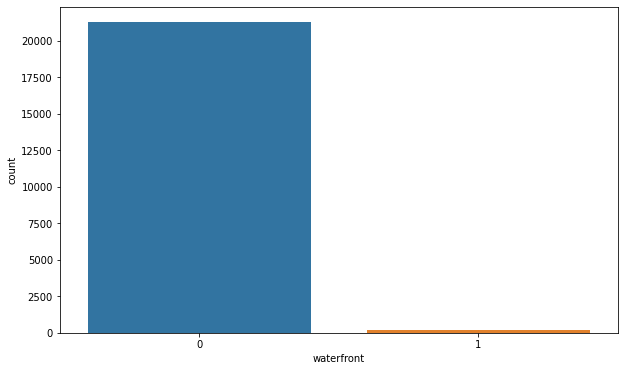

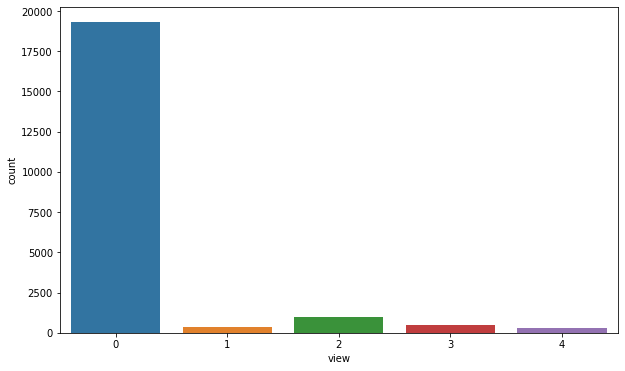

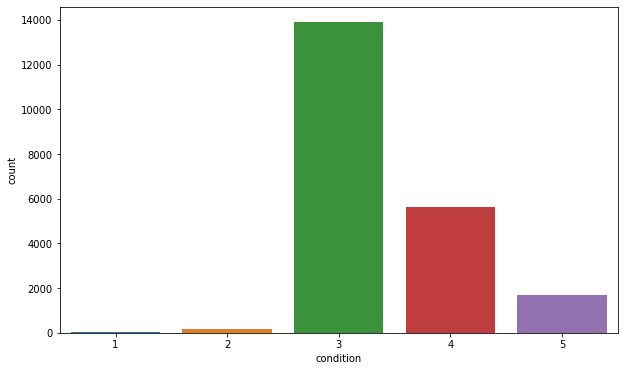

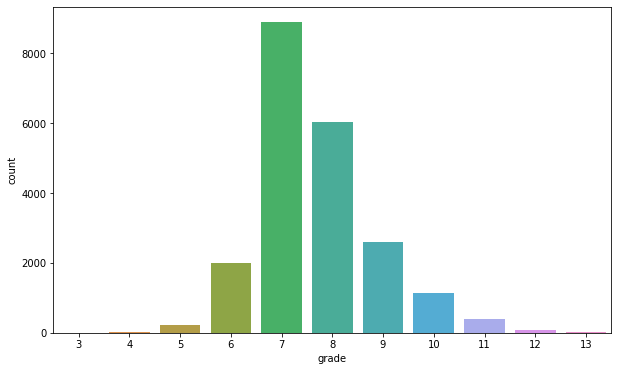

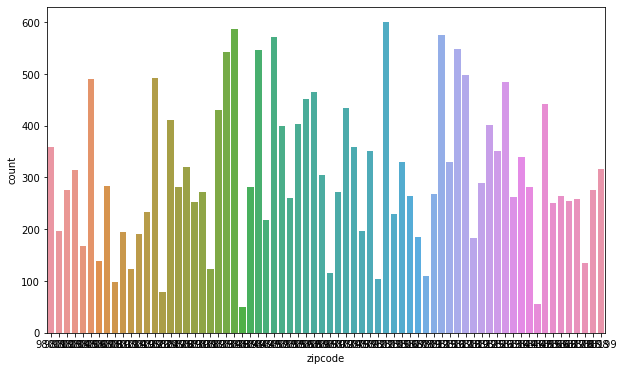

In [27]:
for column in df_cat:
    plt.figure(figsize=(10,6))
    sns.countplot(x=df_cat[column])
    plt.show()

- Distributions similar to normal distribution visible in columns bedrooms, bathrooms, grade
- Waterfront: Binary (0 or 1): Mainly 0, unbalanced -> delete?

- View: Mainly 0, either drop variable or downsample/upsample, bucketing? 0 (no) or others (yes)

#### Check correlations (Multicolinearity)

#### Encode categoricals

1. Copy df_cat for Bucketing 
2. Copy df_cat for Hot encoding
3. Rest of categorical data
4. Merge again into one df_cat 

- getdummies: zipcode, (bedrooms, bathrooms, floors) -> also contain dome kind of order, ordinal?
- bucketing: view 
- rest of categoricals: grade, condition, waterfront

##### Bucketing

In [28]:
cat_binned=df_cat.copy()
cat_binned.head()

bedrooms bathrooms floors waterfront view condition grade zipcode
0        3       1.0    1.0          0    0         3     7   98178
1        3      2.25    2.0          0    0         3     7   98125
2        2       1.0    1.0          0    0         3     6   98028
3        4       3.0    1.0          0    0         5     7   98136
4        3       2.0    1.0          0    0         3     8   98074

In [29]:
#drop other columns except view:
cat_binned=cat_binned.drop(['bedrooms', 'bathrooms', 'floors', 'waterfront', 'condition', 'grade','zipcode'],axis=1)

In [30]:
# Convert to integer to bin variable view
funct.convert_data_types(cat_binned,'number', incolumns=['view'])

In [31]:
#add a new column category next to the view 
category = pd.cut(cat_binned.view,bins=[-0.5,1,4],labels=['No','Yes'])
cat_binned.insert(1,'view_new',category)

In [32]:
#drop view column
cat_binned=cat_binned.drop(['view'],axis=1)

In [33]:
cat_binned.sample(10)

view_new
5049        No
2906        No
20356       No
19449       No
4479        No
610         No
10317       No
14333       No
7735        No
3792        No

In [34]:
cat_binned['view_new']

0        No
1        No
2        No
3        No
4        No
         ..
21592    No
21593    No
21594    No
21595    No
21596    No
Name: view_new, Length: 21420, dtype: category
Categories (2, object): ['No' < 'Yes']

In [35]:
#check order
for column in cat_binned:
    print(cat_binned[column].value_counts())

No     19637
Yes     1783
Name: view_new, dtype: int64


In [36]:
#ordinal encoding
cat_binned['view_new'] = cat_binned['view_new'].map({'No' : 0, 'Yes' : 1})

In [37]:
#convert to integer
funct.convert_data_types(cat_binned,'number', incolumns=['view_new'])

Idea: Might also bin zipcode according to count of zipcodes..

##### GetDummies, OneHot Encoding

In [38]:
df_cat.columns

Index(['bedrooms', 'bathrooms', 'floors', 'waterfront', 'view', 'condition',
       'grade', 'zipcode'],
      dtype='object')

In [39]:
cat_dummies = df_cat.copy()
cat_dummies = cat_dummies.drop(['waterfront', 'view', 'condition','grade'], axis=1)

cat_dummies = pd.get_dummies(cat_dummies)
cat_dummies.head()

bedrooms_1  bedrooms_2  bedrooms_3  bedrooms_4  bedrooms_5  bedrooms_6  \
0           0           0           1           0           0           0   
1           0           0           1           0           0           0   
2           0           1           0           0           0           0   
3           0           0           0           1           0           0   
4           0           0           1           0           0           0   

   bedrooms_7  bedrooms_8  bedrooms_9  bedrooms_10  ...  zipcode_98146  \
0           0           0           0            0  ...              0   
1           0           0           0            0  ...              0   
2           0           0           0            0  ...              0   
3           0           0           0            0  ...              0   
4           0           0           0            0  ...              0   

   zipcode_98148  zipcode_98155  zipcode_98166  zipcode_98168  zipcode_98177  \
0              0              0              0              0              0   
1              0              0              0              0              0   
2              0              0              0              0              0   
3              0              0              0              0              0   
4              0              0              0              0              0   

   zipcode_98178  zipcode_98188  zipcode_98198  zipcode_98199  
0              1              0              0              0  
1              0              0              0              0  
2              0              0              0              0  
3              0              0              0              0  
4              0              0              0              0  

[5 rows x 117 columns]

##### Rest of Categoricals

In [40]:
cat_ordinals = df_cat.copy()
cat_ordinals = cat_ordinals.drop(['view','bedrooms', 'bathrooms', 'floors','zipcode'], axis=1)

In [41]:
#check order
for column in cat_ordinals:
    print(cat_ordinals[column].value_counts())

0    21257
1      163
Name: waterfront, dtype: int64
3    13900
4     5643
5     1687
2      162
1       28
Name: condition, dtype: int64
7     8889
8     6041
9     2606
6     1995
10    1130
11     396
5      234
12      88
4       27
13      13
3        1
Name: grade, dtype: int64


Only convert them to integers, as waterfront is already in correct order, condition and grade may also contain further values in future. 

In [42]:
funct.convert_data_types(cat_ordinals,'number', incolumns=['waterfront','grade','condition'])

##### Merge Categoricals

In [43]:
df_cat_encoded = pd.concat([cat_dummies, cat_ordinals, cat_binned], axis=1)
df_cat_encoded.head()

bedrooms_1  bedrooms_2  bedrooms_3  bedrooms_4  bedrooms_5  bedrooms_6  \
0           0           0           1           0           0           0   
1           0           0           1           0           0           0   
2           0           1           0           0           0           0   
3           0           0           0           1           0           0   
4           0           0           1           0           0           0   

   bedrooms_7  bedrooms_8  bedrooms_9  bedrooms_10  ...  zipcode_98168  \
0           0           0           0            0  ...              0   
1           0           0           0            0  ...              0   
2           0           0           0            0  ...              0   
3           0           0           0            0  ...              0   
4           0           0           0            0  ...              0   

   zipcode_98177  zipcode_98178  zipcode_98188  zipcode_98198  zipcode_98199  \
0              0              1              0              0              0   
1              0              0              0              0              0   
2              0              0              0              0              0   
3              0              0              0              0              0   
4              0              0              0              0              0   

   waterfront  condition  grade  view_new  
0           0          3      7         0  
1           0          3      7         0  
2           0          3      6         0  
3           0          5      7         0  
4           0          3      8         0  

[5 rows x 121 columns]

### Numerical Data

#### Save numerical data in new df_num

In [44]:
df_num = pd.DataFrame(df_pro.select_dtypes(np.number))
df_num.describe()

id   sqft_living      sqft_lot    sqft_above  sqft_basement  \
count  2.142000e+04  21420.000000  21420.000000  21420.000000   21420.000000   
mean   4.580940e+09   2061.089449   8704.695495   1772.544304     284.491877   
std    2.876761e+09    839.023361   5052.137717    765.159628     417.353536   
min    1.000102e+06    370.000000    520.000000    370.000000       0.000000   
25%    2.123537e+09   1430.000000   5040.000000   1200.000000       0.000000   
50%    3.904921e+09   1920.000000   7614.000000   1560.000000       0.000000   
75%    7.308900e+09   2550.000000  10690.500000   2220.000000     560.000000   
max    9.900000e+09   4230.000000  19166.250000   3750.000000    1400.000000   

           yr_built  yr_renovated           lat          long  sqft_living15  \
count  21420.000000  21420.000000  21420.000000  21420.000000   21420.000000   
mean    1971.092997     84.793091     47.560198   -122.214794    1977.543697   
std       29.387141    402.574626      0.138588      0.137170     650.732906   
min     1900.000000      0.000000     47.160850   -122.519000     399.000000   
25%     1952.000000      0.000000     47.471200   -122.328000    1490.000000   
50%     1975.000000      0.000000     47.572100   -122.230000    1840.000000   
75%     1997.000000      0.000000     47.678100   -122.125000    2370.000000   
max     2015.000000   2015.000000     47.777600   -121.820500    3690.000000   

         sqft_lot15         price  
count  21420.000000  2.142000e+04  
mean    8296.576412  5.120008e+05  
std     4368.379010  2.500123e+05  
min      651.000000  7.800000e+04  
25%     5100.000000  3.225000e+05  
50%     7620.000000  4.500000e+05  
75%    10086.250000  6.450000e+05  
max    17565.625000  1.128750e+06

#### Check correlations

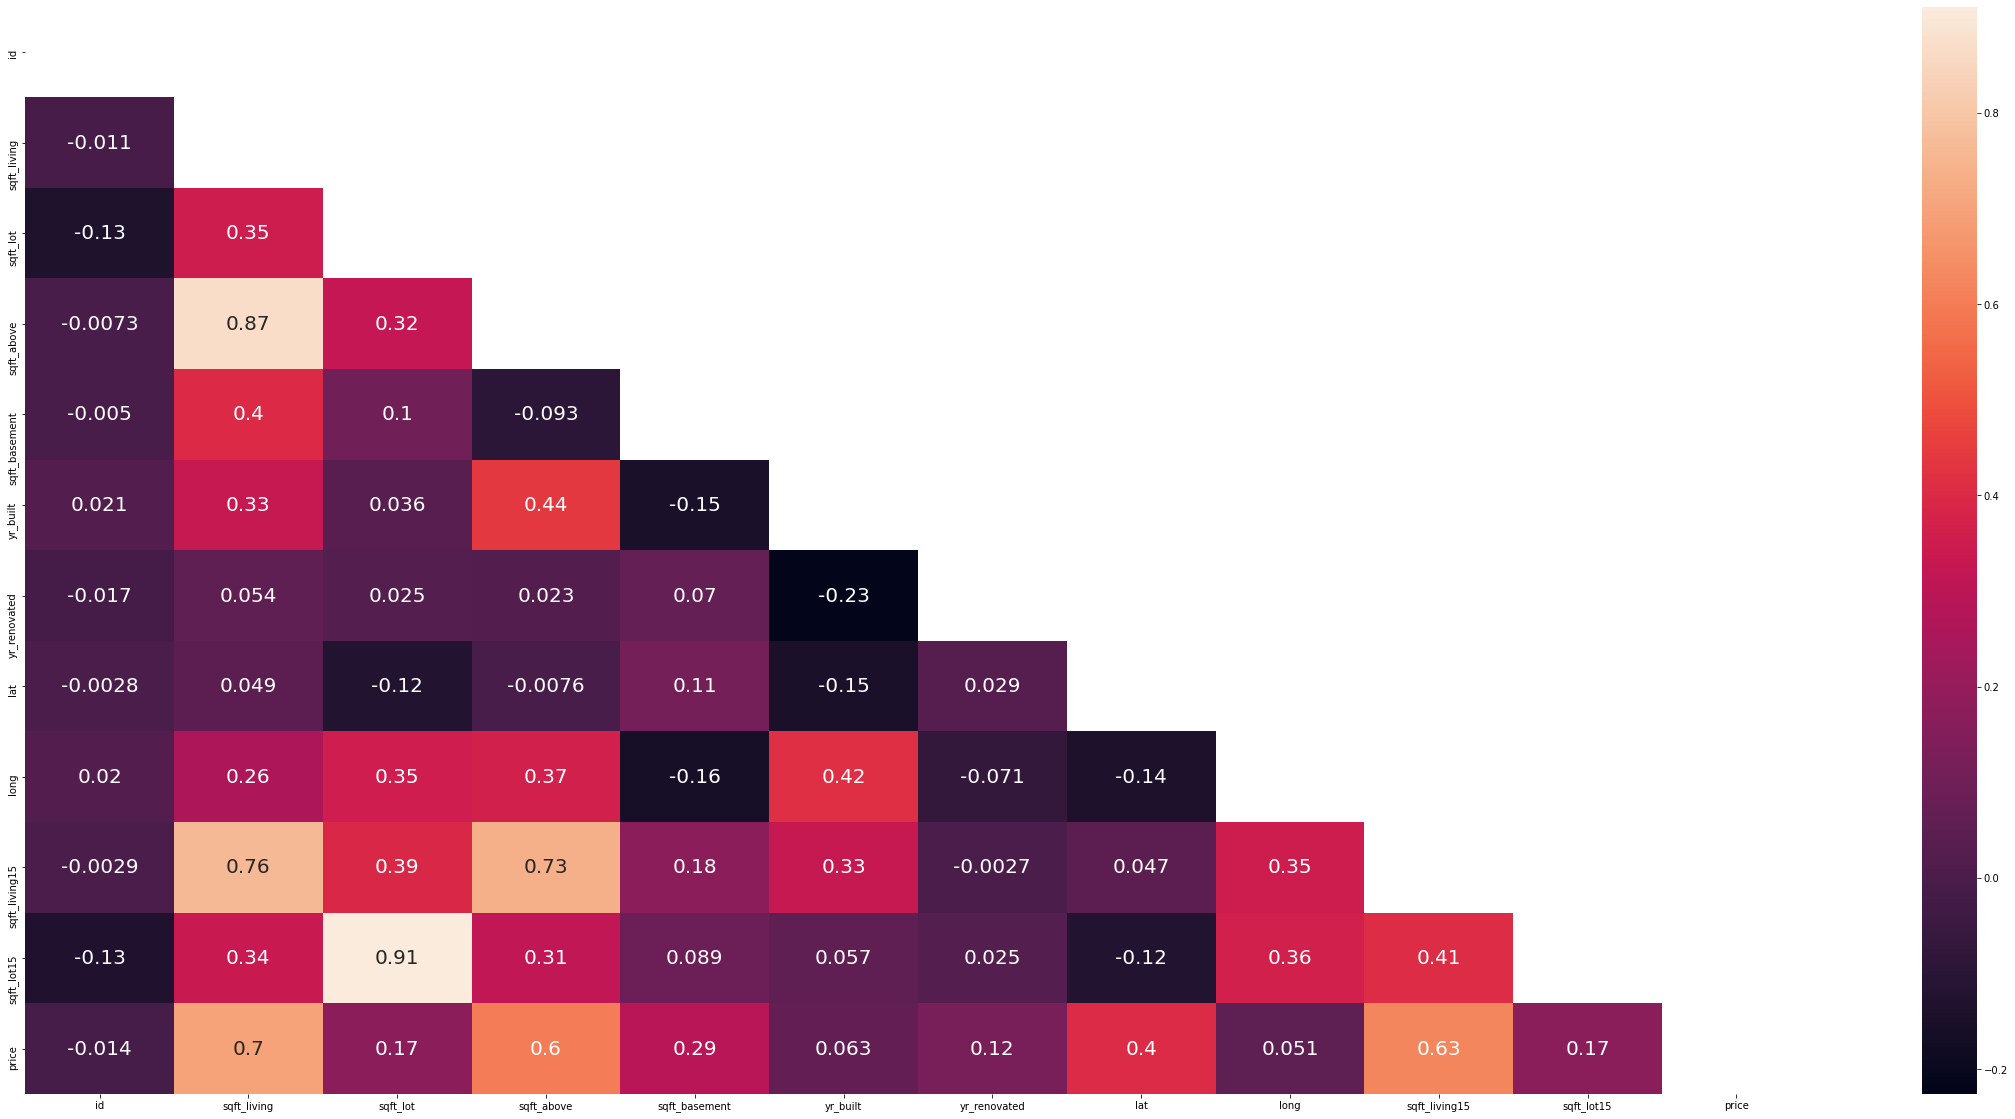

In [45]:
mask = np.zeros_like(df_num.corr())

mask[np.triu_indices_from(mask)] = True

fig, ax = plt.subplots(figsize=(40, 20))
ax = sns.heatmap(df_num.corr(), mask=mask, annot=True, annot_kws={"size": 20})
plt.show()

- Variable sqft_above, and sqft_lot15 have high correlations with some other variables-> could be dropped, but they have high correlation with target value price therefore keep them and try.

- Drop id, as not needed for model, does not have impact on result.

#### Check Distributions

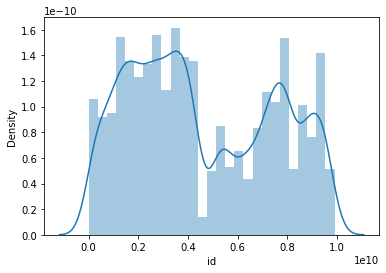

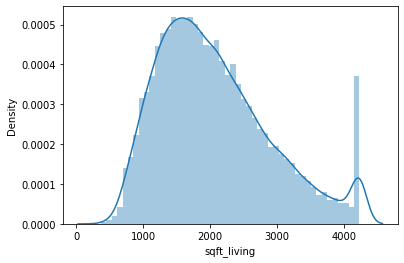

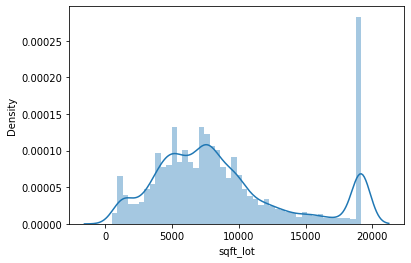

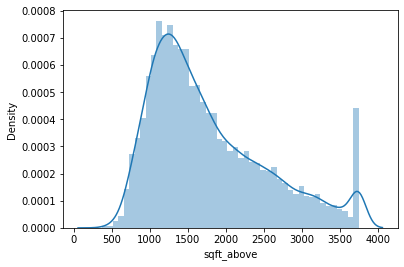

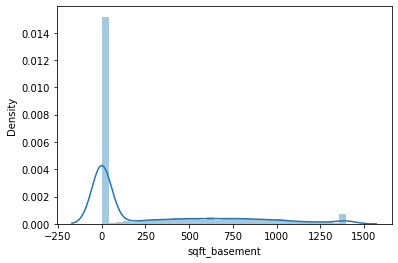

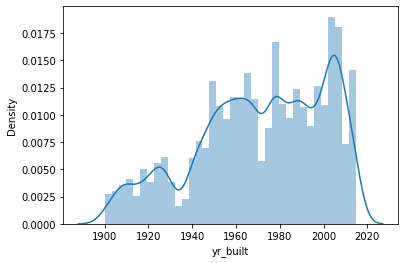

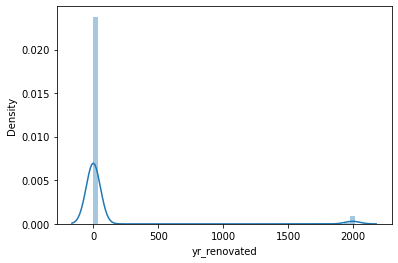

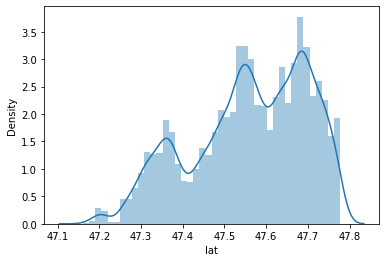

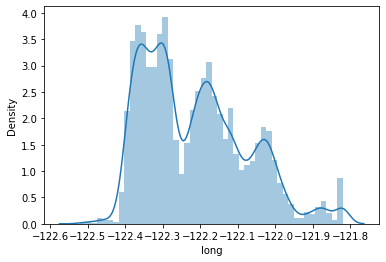

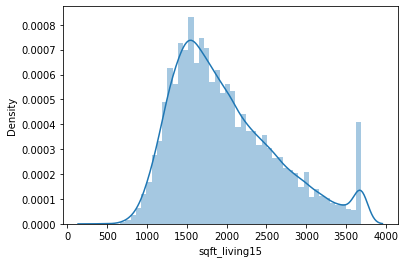

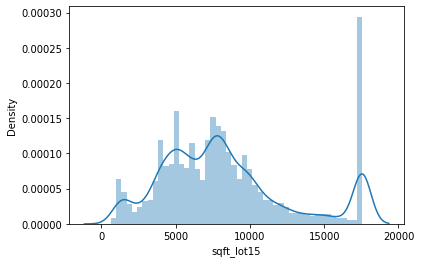

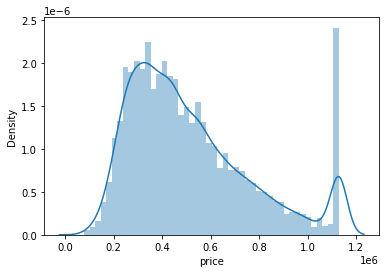

In [46]:
funct.distributions(df_num)

### Dates 

#### Save dates data in new df_date

In [47]:
df_date=df_pro.copy()

In [48]:
df_date=df_date.drop(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement','id','zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'price'],axis=1)

In [49]:
df_date.sample(20)

date  yr_built  yr_renovated
1984  2014-07-23      1959             0
20927 2014-12-04      2005             0
7784  2014-06-03      1906             0
20253 2015-03-17      2012             0
11314 2014-08-18      1958             0
15906 2014-07-14      1953             0
3562  2014-07-23      1966             0
1974  2015-01-05      1963             0
15315 2015-05-05      1922             0
11089 2015-04-01      2008             0
4986  2014-05-16      1981             0
20392 2014-10-06      2014             0
14380 2015-04-07      1906             0
1197  2014-06-05      1980             0
9703  2015-03-23      1981             0
20757 2014-06-17      2007             0
1658  2014-12-04      1997             0
3565  2014-05-22      1904             0
2757  2015-03-11      1959             0
2690  2015-04-12      1966             0

In [50]:
df_date['day'] = df_date['date'].dt.day
df_date['week'] = df_date['date'].dt.week
df_date['month'] = df_date['date'].dt.month

#df_date['yr_built'] =df_date['yr_built'].dt.year
#df_date['yr_renovated'] =df_date['yr_renovated'].dt.year
#Error: For yr_renovated & yr_built it gives only 1970, when having it converted to datetime before.
#Drop for the moment

In [51]:
#remove date column
df_date=df_date.drop(['date','yr_renovated','yr_built'],axis=1)

In [52]:
df_date.sample(50)

day  week  month
20542   18    51     12
11745   11     7      2
13263   20     4      1
3859     1    18      5
16380   23    13      3
5872    30    14      3
8454    11    33      8
19646    3    10      3
21034   19     8      2
5820    27    35      8
4140    12    46     11
4639     6    19      5
15875   28    35      8
9158    25    35      8
3924     7    15      4
3933    30    31      7
19582   23     9      2
6549    27    13      3
5686     6    15      4
11310   14    33      8
19199   13    16      4
11571   27    44     10
18905   21    21      5
12867   13    33      8
16815   20    21      5
8028    20    25      6
17219   28    22      5
2135     5    36      9
8373     5    23      6
5741    13    20      5
1439     5    10      3
15625   13     7      2
10458   10     7      2
14063   20    47     11
21      26    35      8
14555    7    15      4
7970     8    28      7
11067    6    45     11
12884   10    41     10
942     11    33      8
1212    25    48     11
13198   11    11      3
11595    5    19      5
3566    24    39      9
17964   22    30      7
15556    6    19      5
11343   15    20      5
1635    20     8      2
19192   26    39      9
5916     3    27      7

### Concat Numericals, Categoricals, and dates

In [53]:
data_prepro = pd.concat([df_cat_encoded, df_num, df_date], axis=1)
data_prepro.head()

bedrooms_1  bedrooms_2  bedrooms_3  bedrooms_4  bedrooms_5  bedrooms_6  \
0           0           0           1           0           0           0   
1           0           0           1           0           0           0   
2           0           1           0           0           0           0   
3           0           0           0           1           0           0   
4           0           0           1           0           0           0   

   bedrooms_7  bedrooms_8  bedrooms_9  bedrooms_10  ...  yr_built  \
0           0           0           0            0  ...      1955   
1           0           0           0            0  ...      1951   
2           0           0           0            0  ...      1933   
3           0           0           0            0  ...      1965   
4           0           0           0            0  ...      1987   

   yr_renovated      lat     long  sqft_living15  sqft_lot15     price  day  \
0             0  47.5112 -122.257         1340.0      5650.0  221900.0   13   
1          1991  47.7210 -122.319         1690.0      7639.0  538000.0    9   
2             0  47.7379 -122.233         2720.0      8062.0  180000.0   25   
3             0  47.5208 -122.393         1360.0      5000.0  604000.0    9   
4             0  47.6168 -122.045         1800.0      7503.0  510000.0   18   

   week  month  
0    42     10  
1    50     12  
2     9      2  
3    50     12  
4     8      2  

[5 rows x 136 columns]

In [54]:
#drop id, not needed for outpur of model
data_prepro=data_prepro.drop(['id'],axis=1)

In [55]:
data_prepro.info() #all numerical now

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21420 entries, 0 to 21596
Columns: 135 entries, bedrooms_1 to month
dtypes: float64(9), int64(9), uint8(117)
memory usage: 6.0 MB


## Prepare Data for Regression Model

- Train-Test Split
- Save transformer in pickle
- apply pickle to test set

### Train-Test Split

In [56]:
X = data_prepro.drop(['price'], axis=1)
y = data_prepro['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=18)

### Standization, Normalization, BoxCox of Train Set

Question: To all (num+cat data) in X_train? Also transform Y_train?

#### Test Standardizer and Normalizer on copies of X_train

Distributions of: StandardScaler()


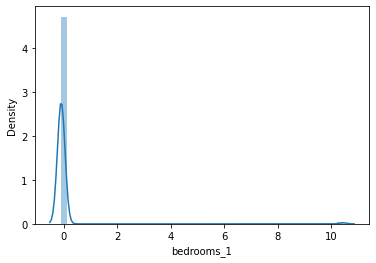

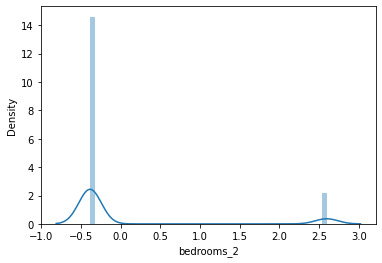

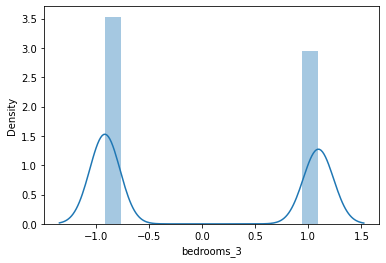

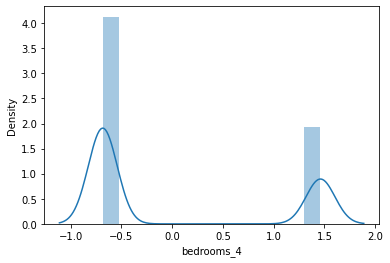

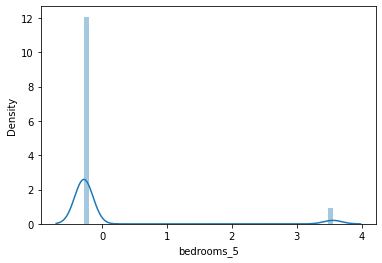

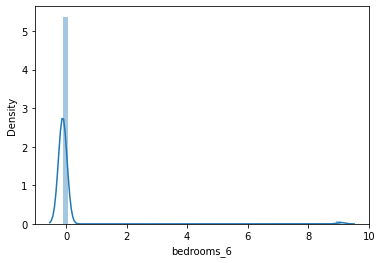

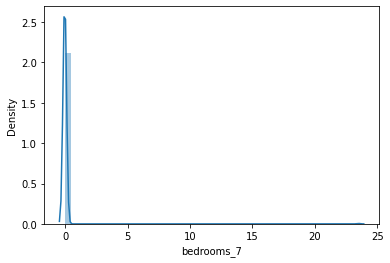

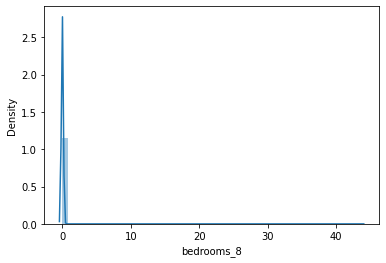

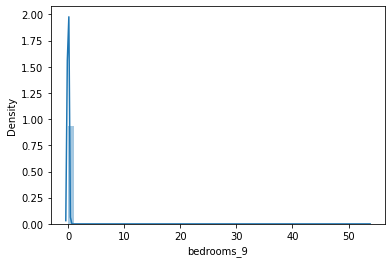

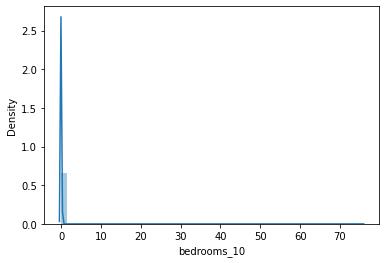

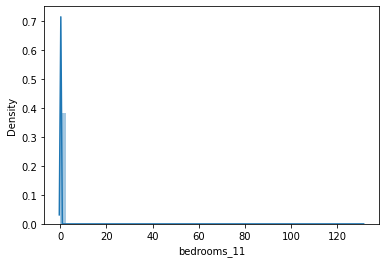

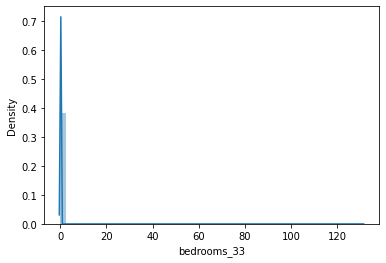

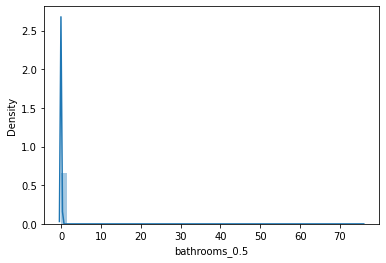

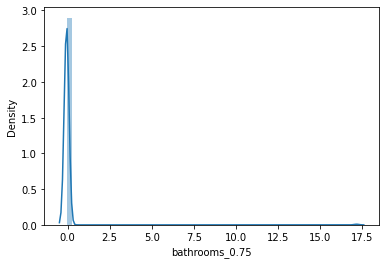

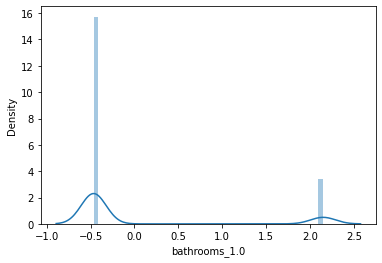

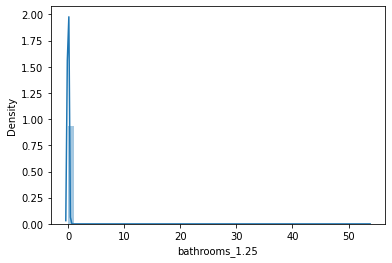

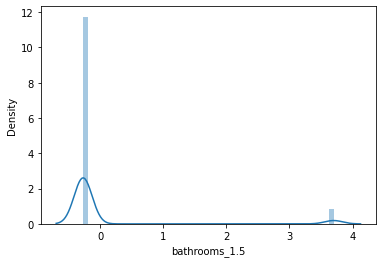

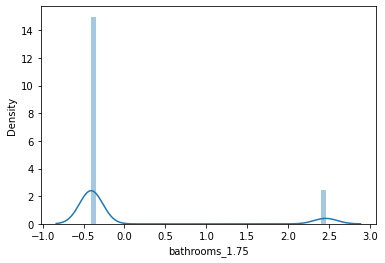

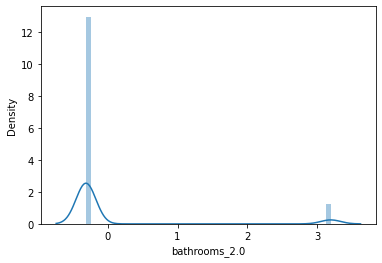

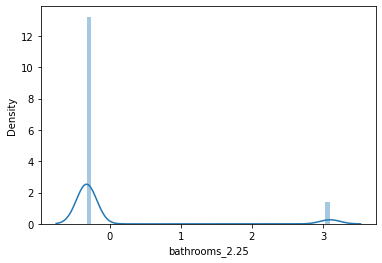

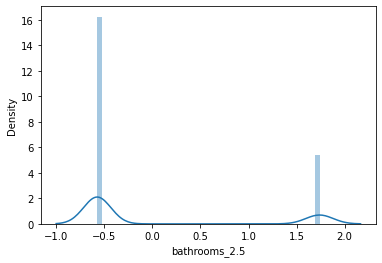

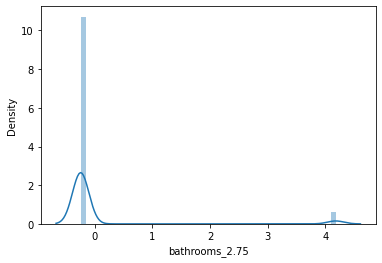

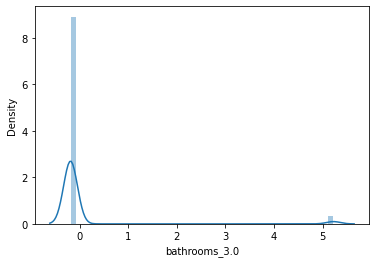

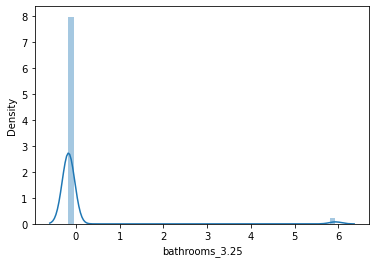

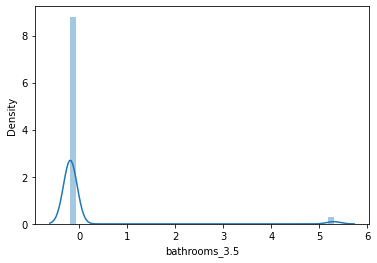

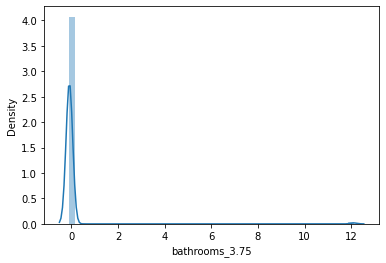

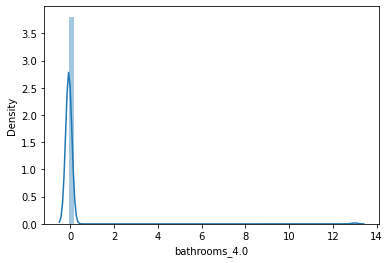

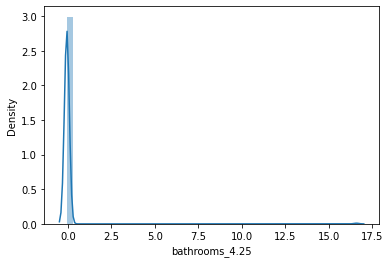

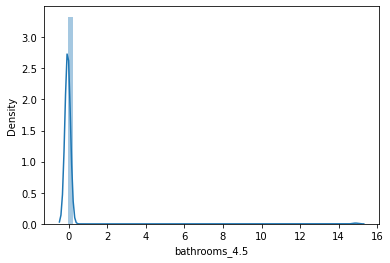

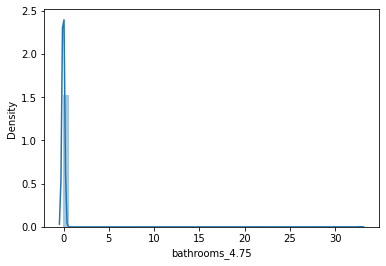

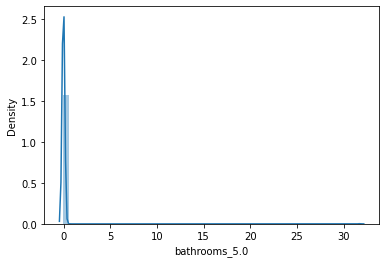

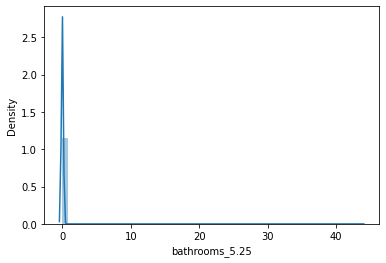

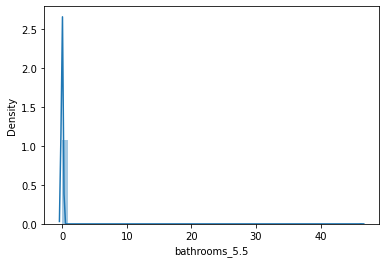

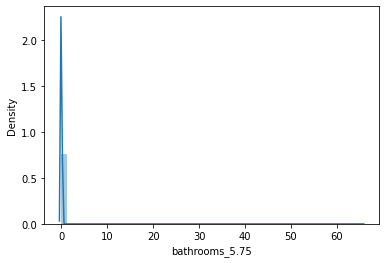

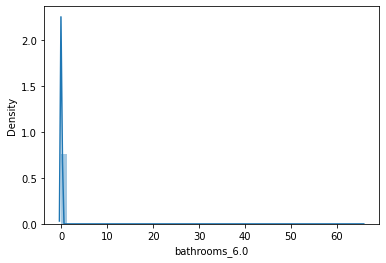

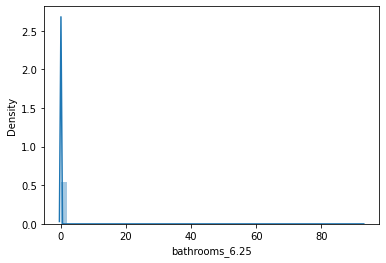

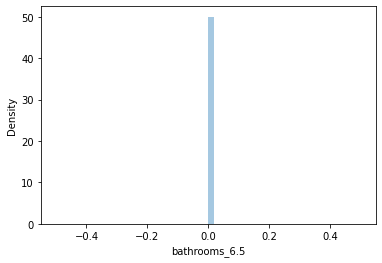

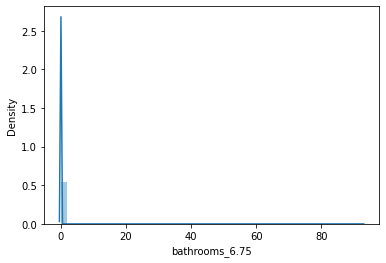

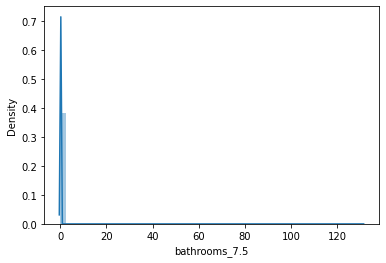

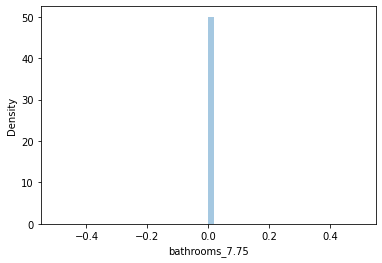

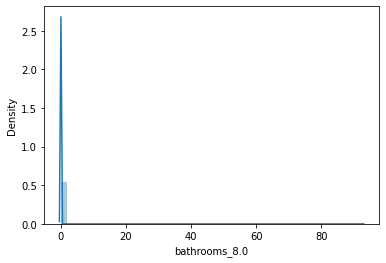

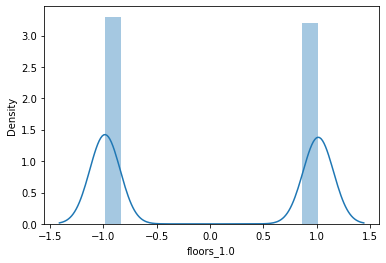

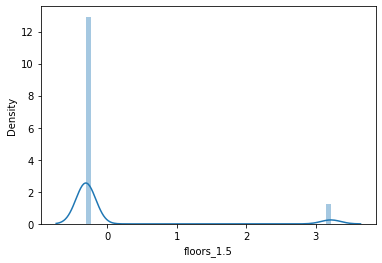

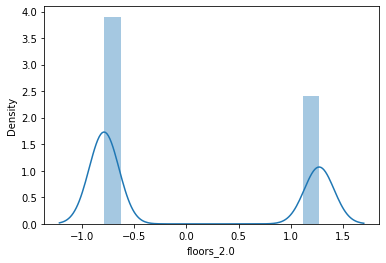

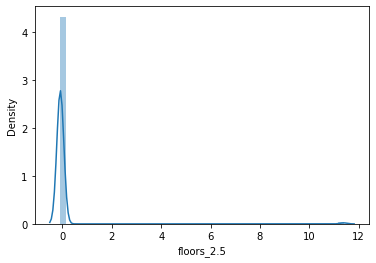

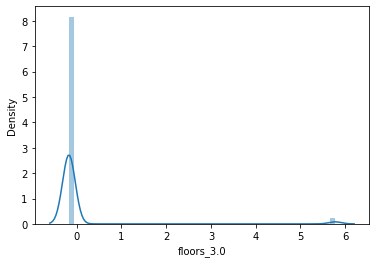

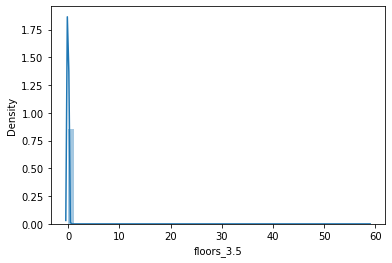

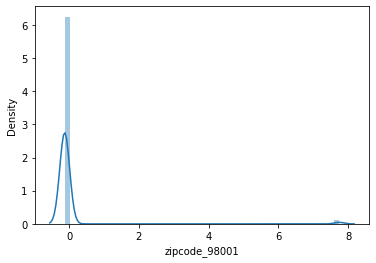

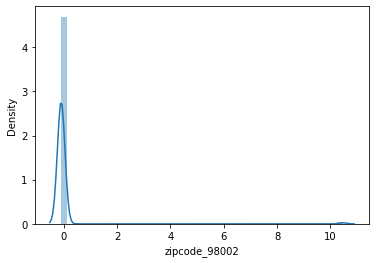

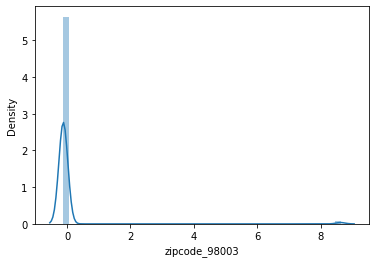

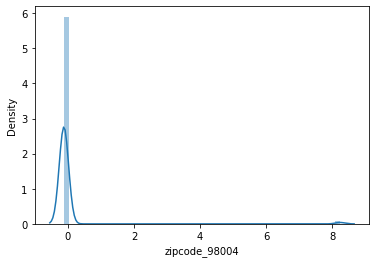

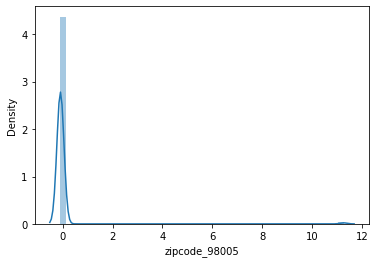

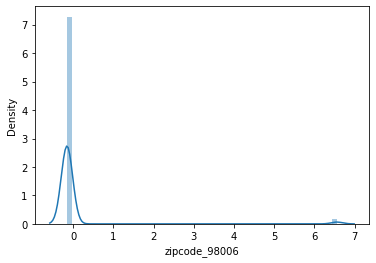

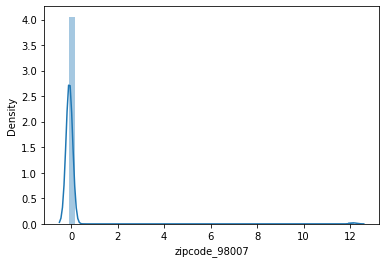

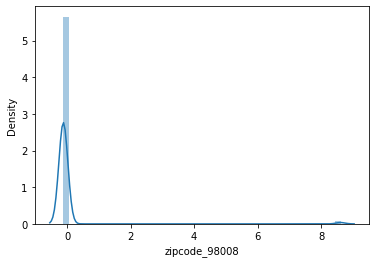

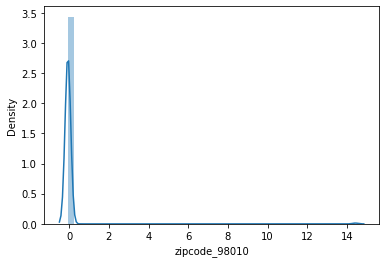

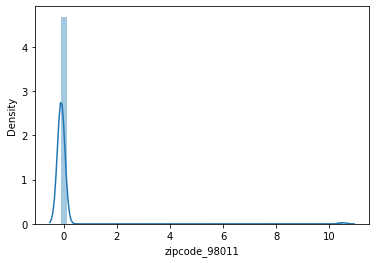

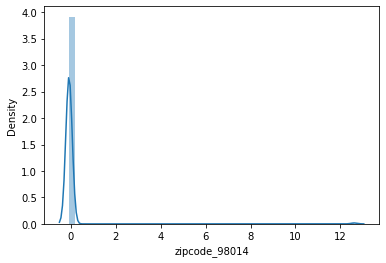

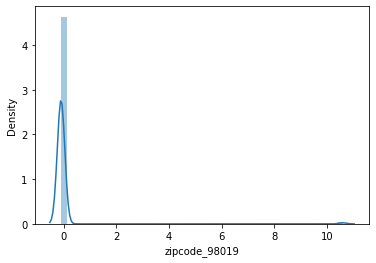

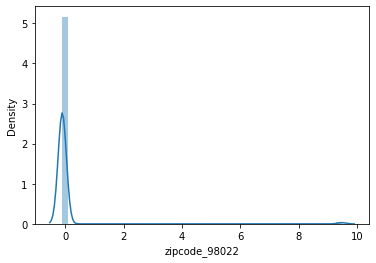

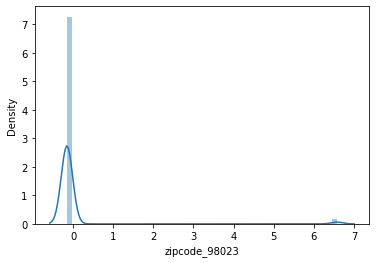

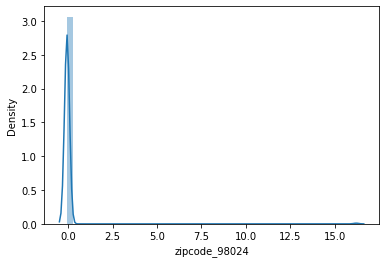

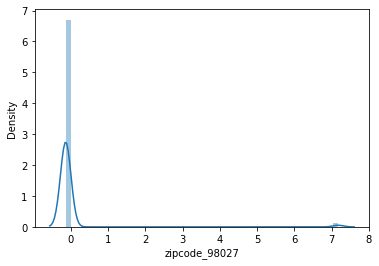

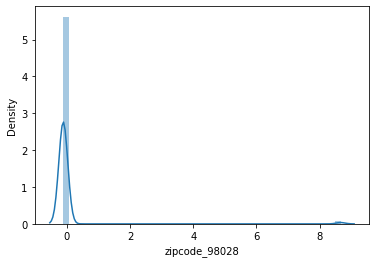

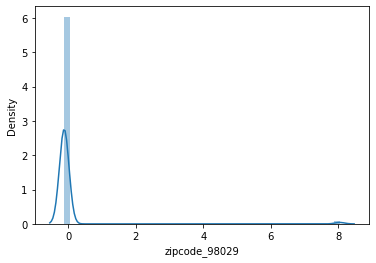

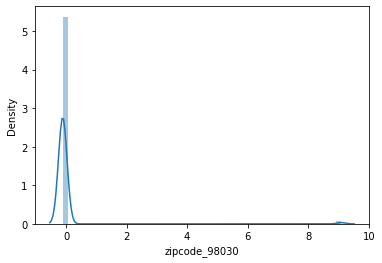

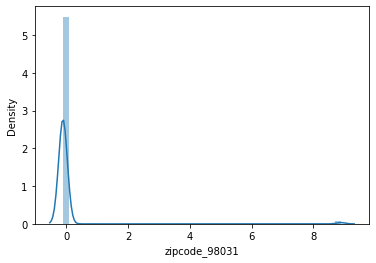

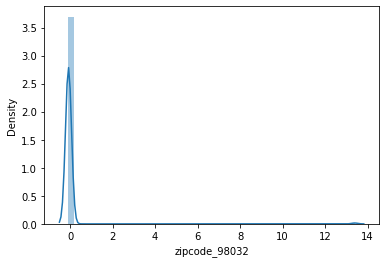

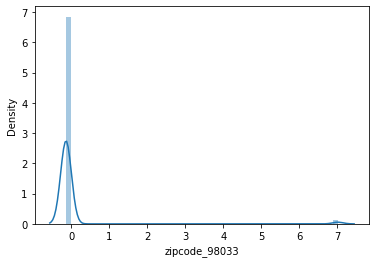

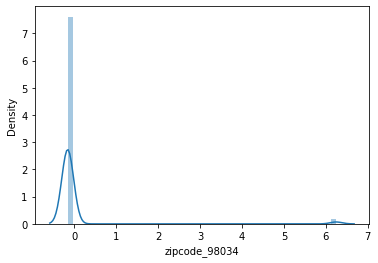

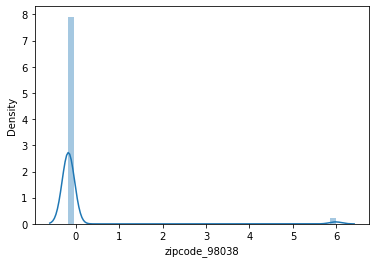

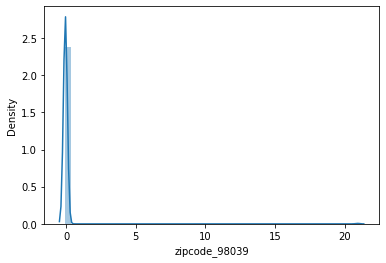

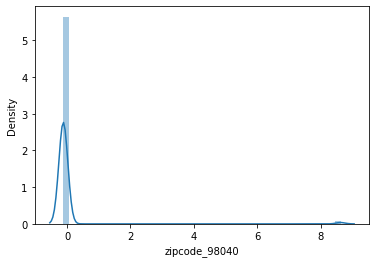

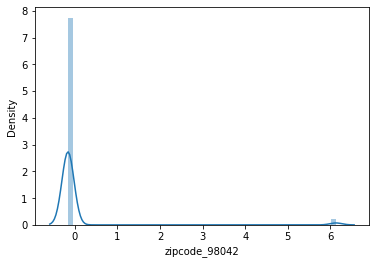

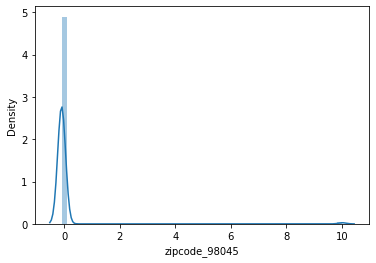

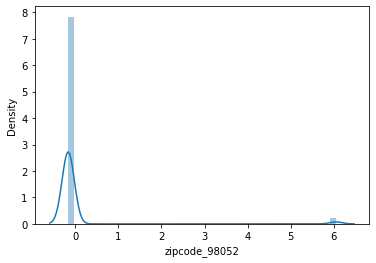

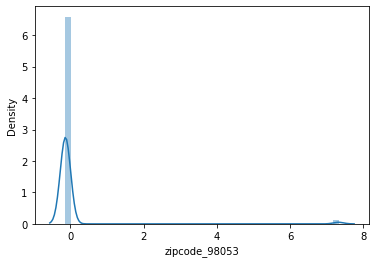

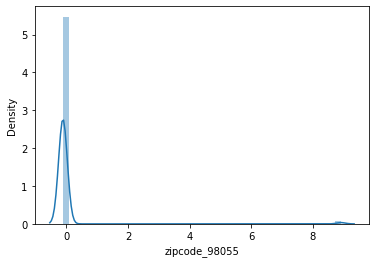

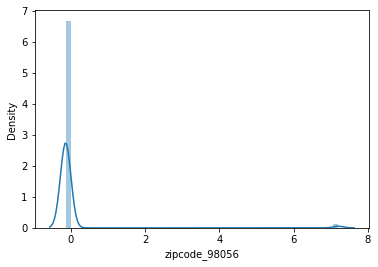

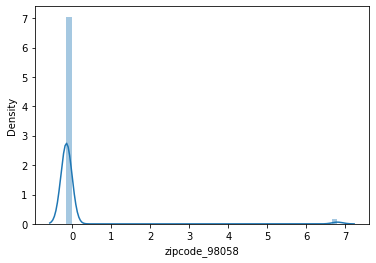

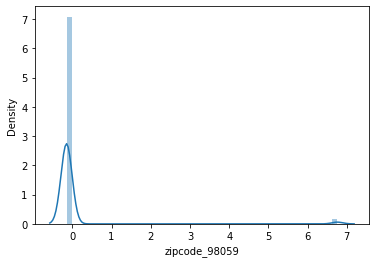

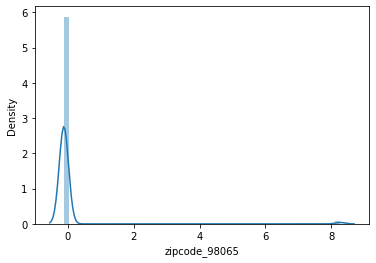

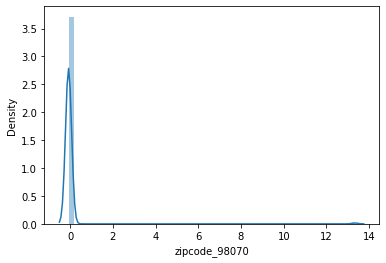

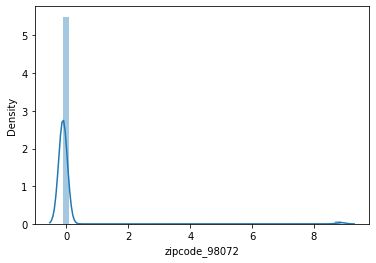

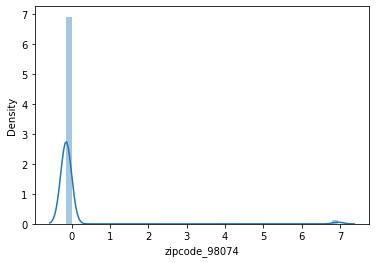

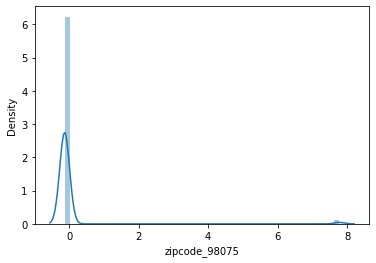

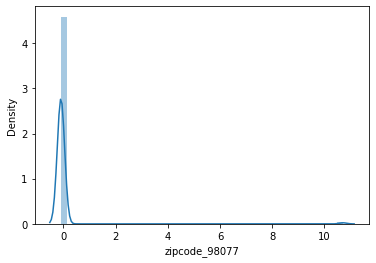

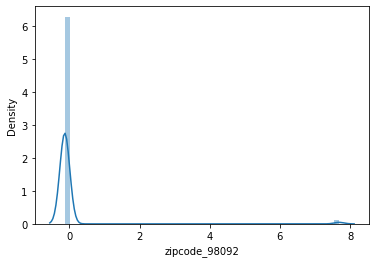

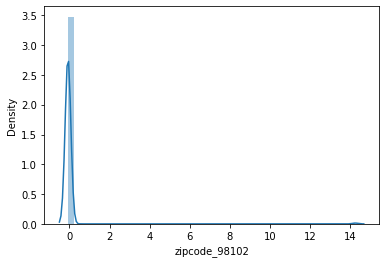

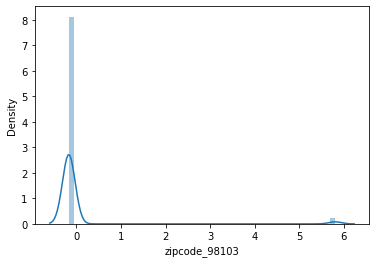

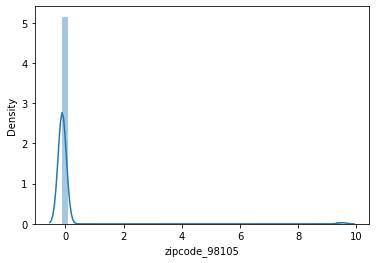

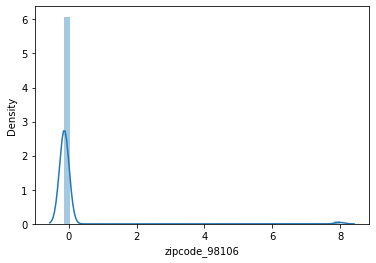

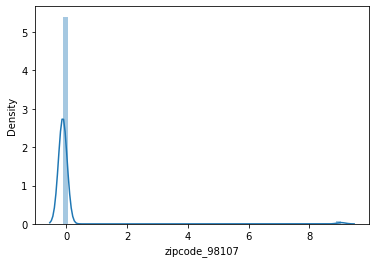

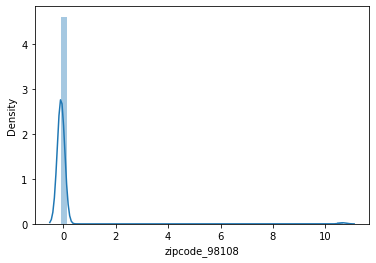

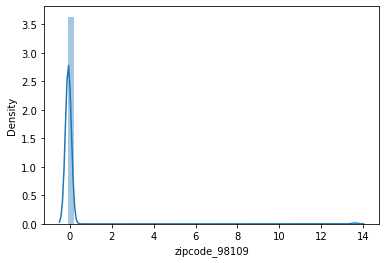

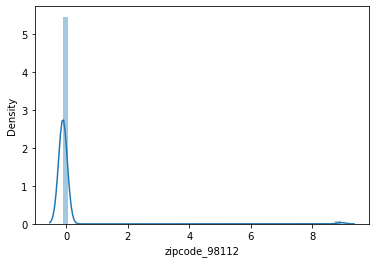

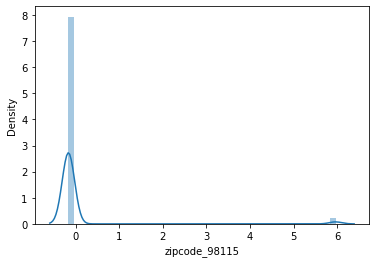

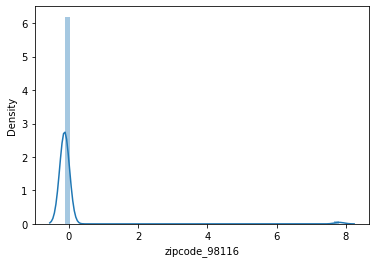

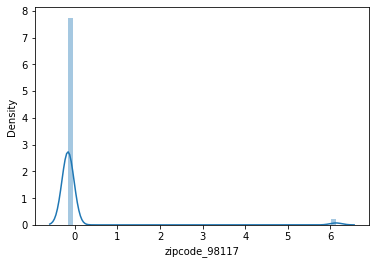

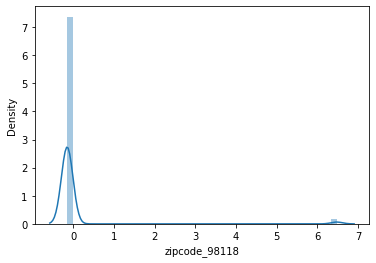

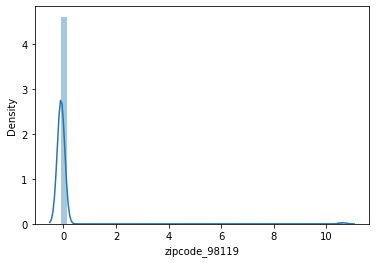

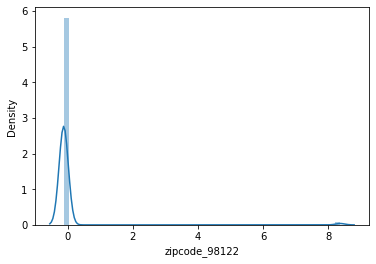

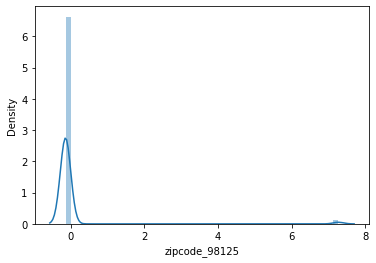

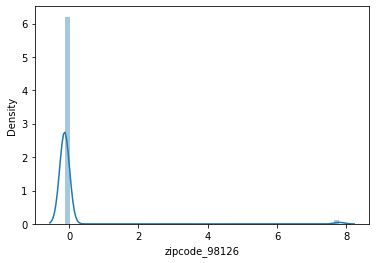

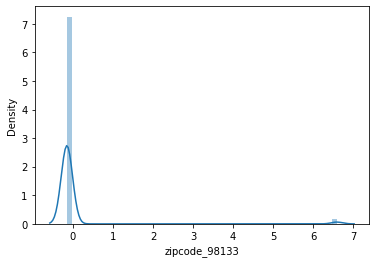

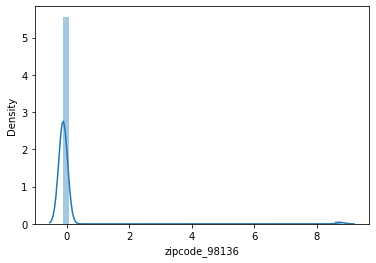

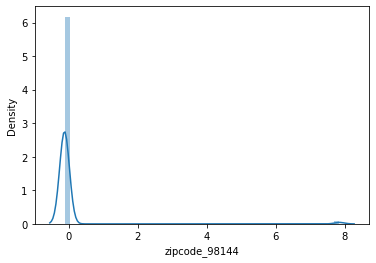

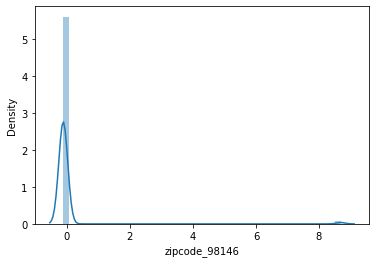

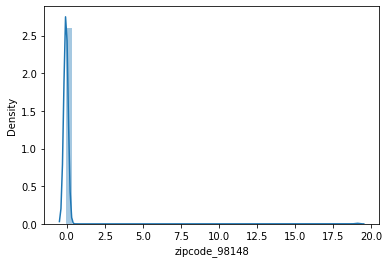

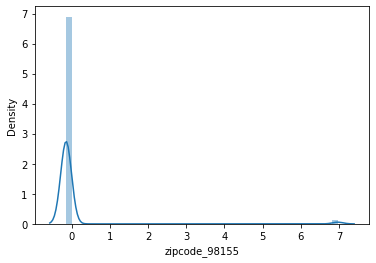

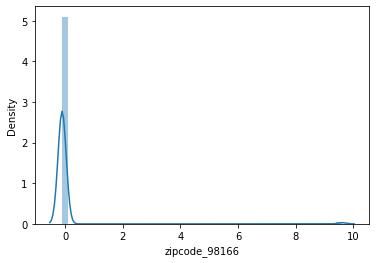

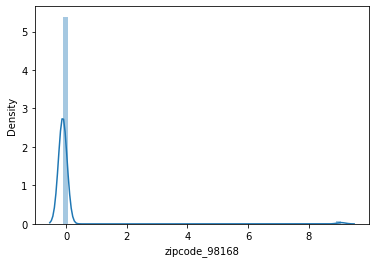

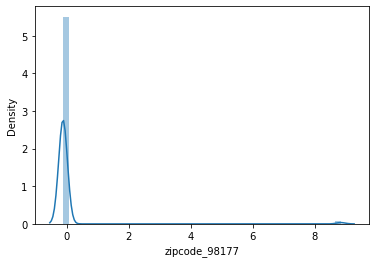

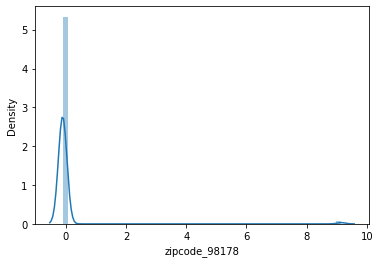

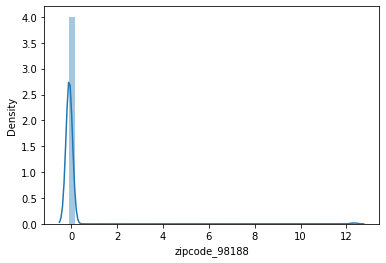

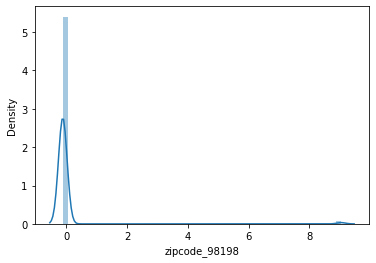

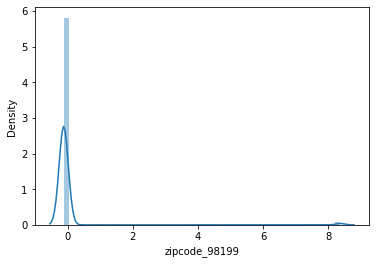

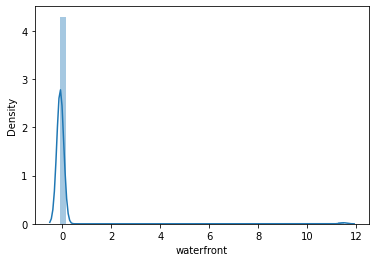

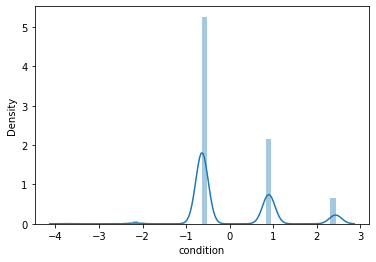

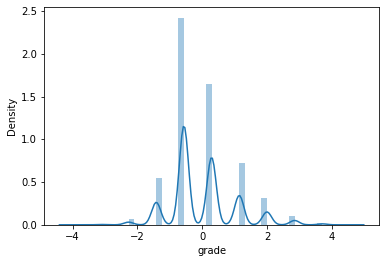

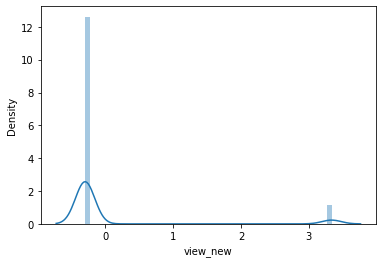

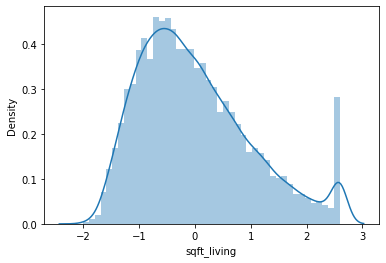

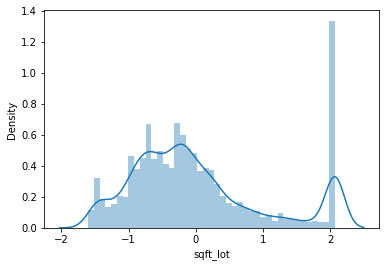

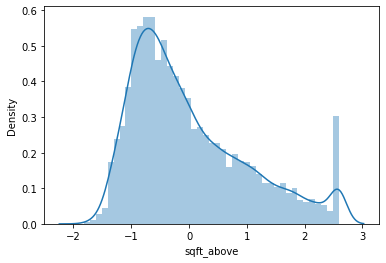

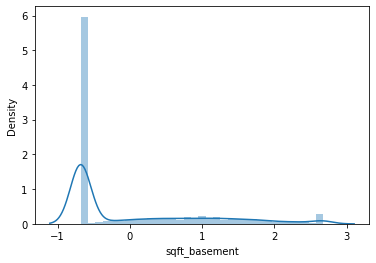

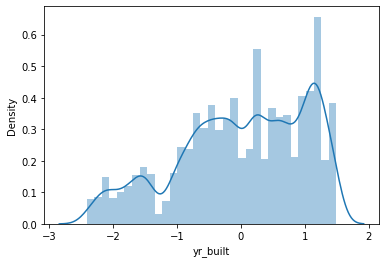

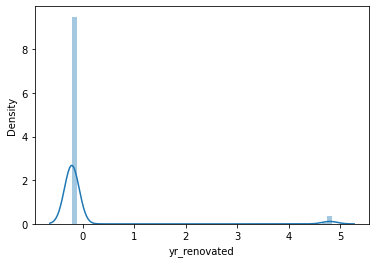

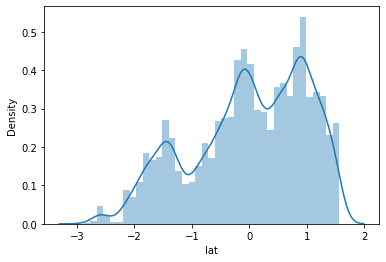

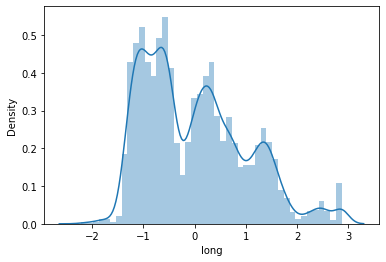

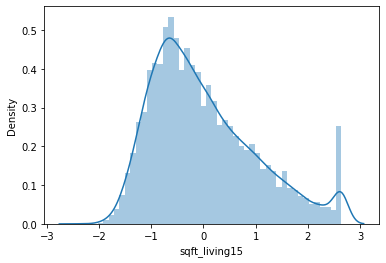

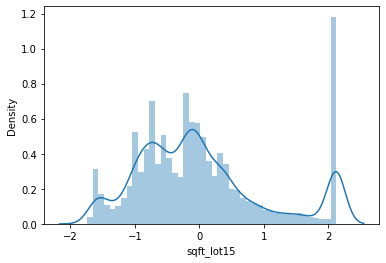

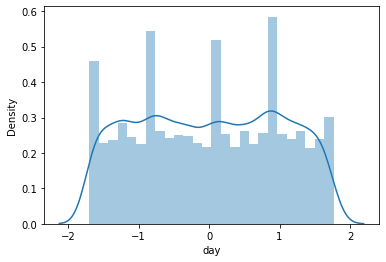

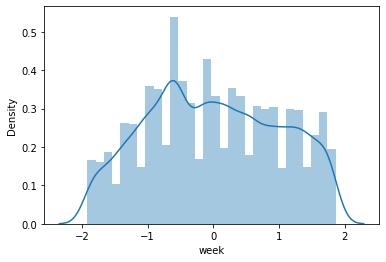

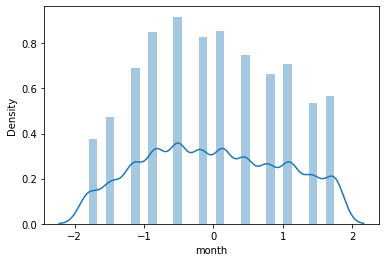

Distributions of: Normalizer()


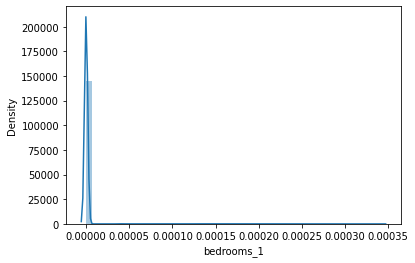

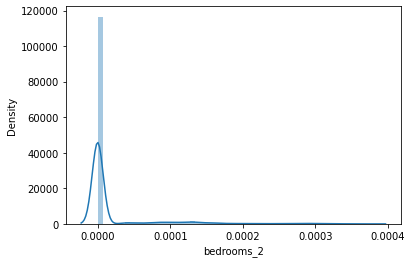

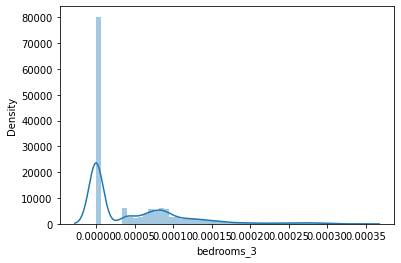

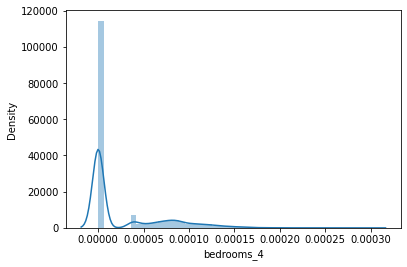

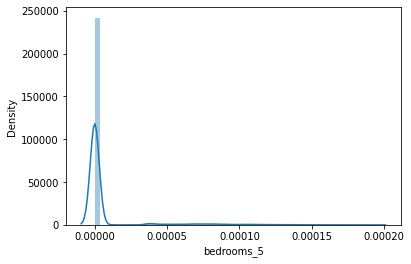

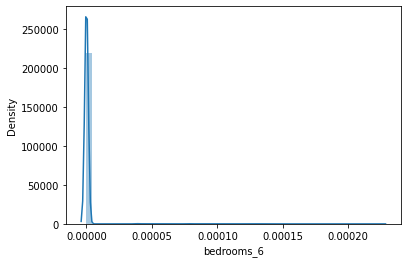

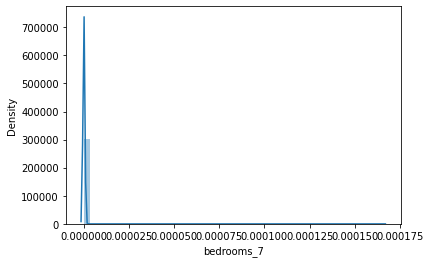

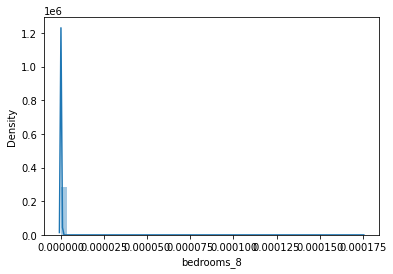

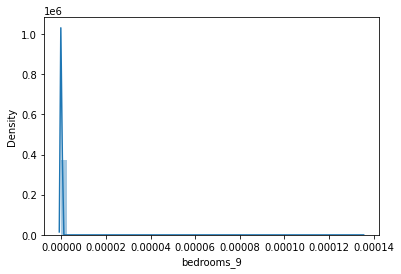

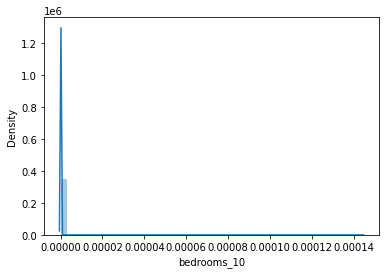

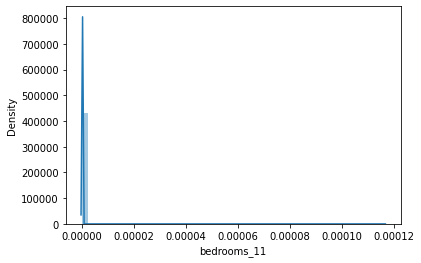

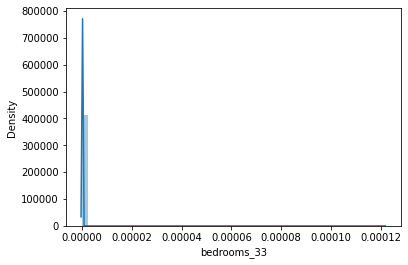

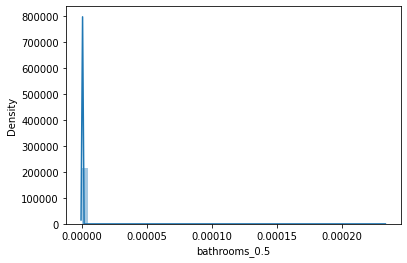

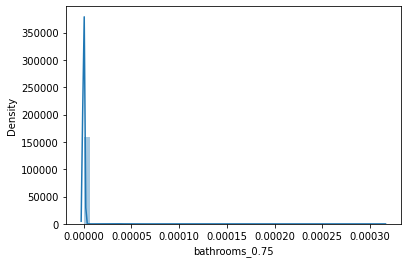

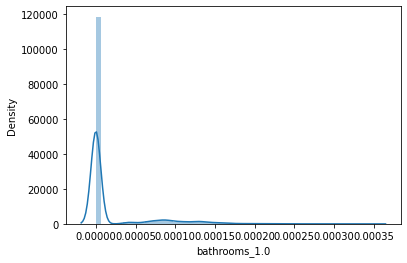

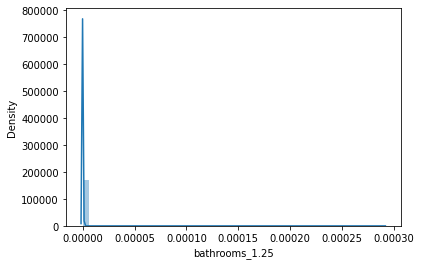

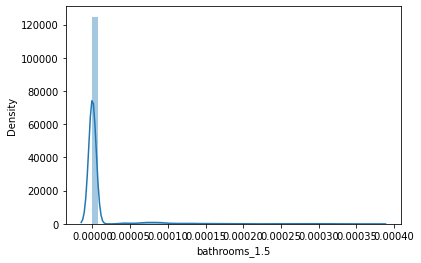

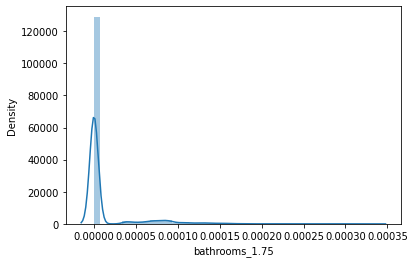

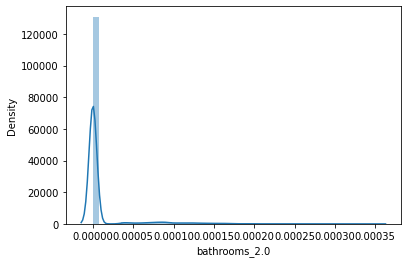

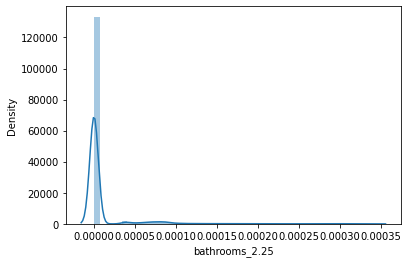

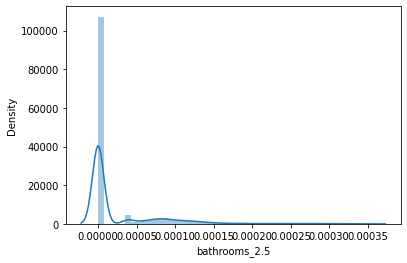

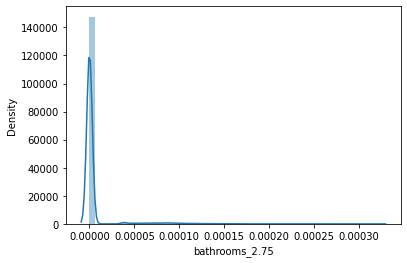

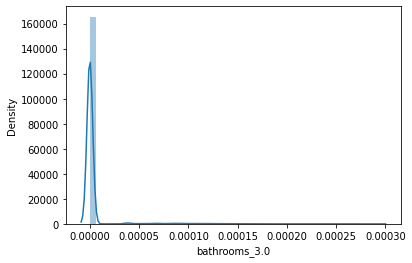

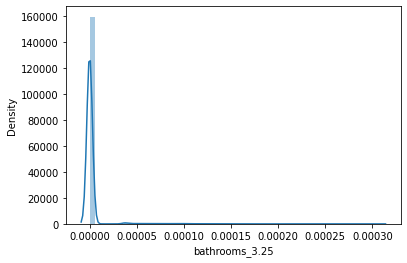

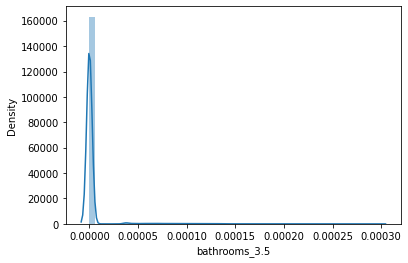

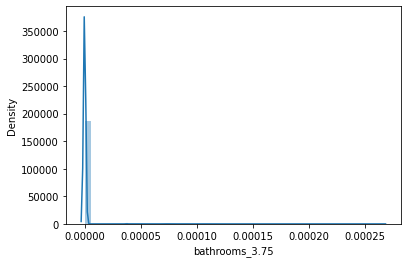

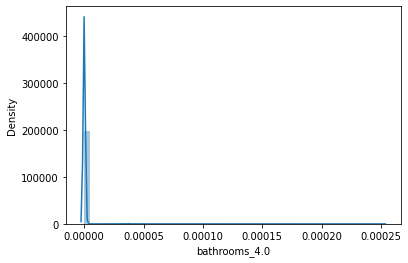

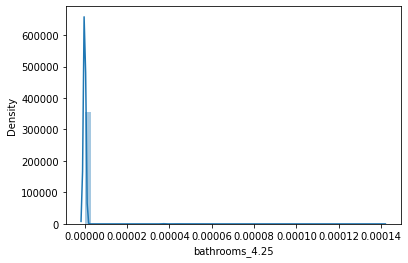

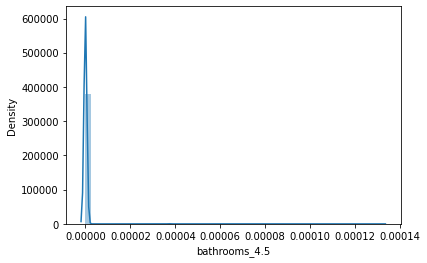

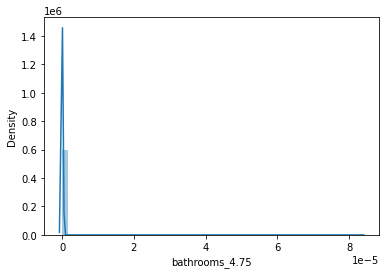

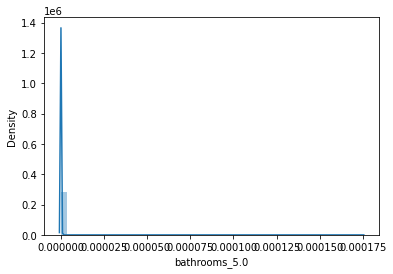

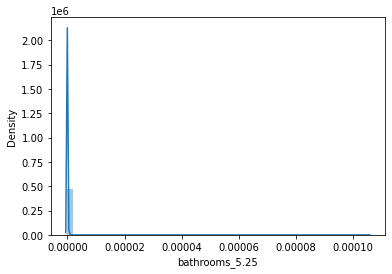

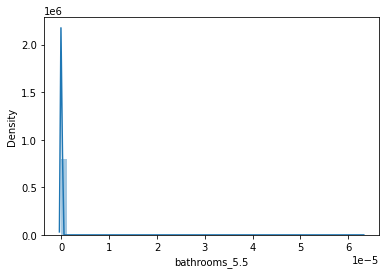

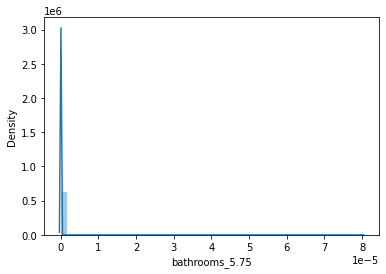

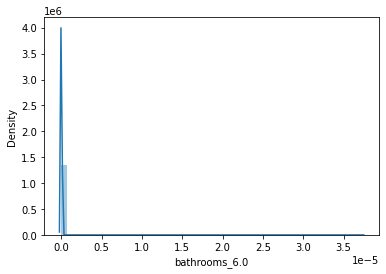

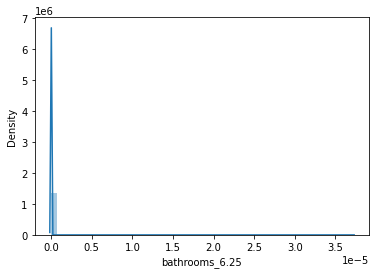

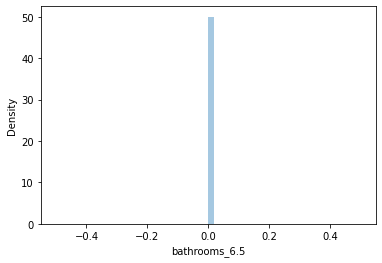

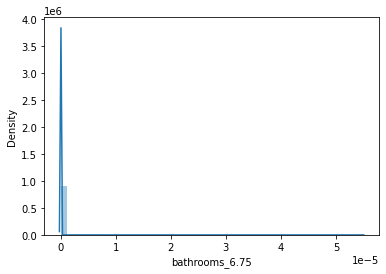

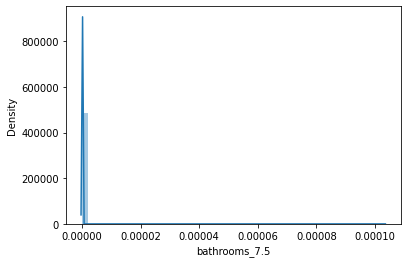

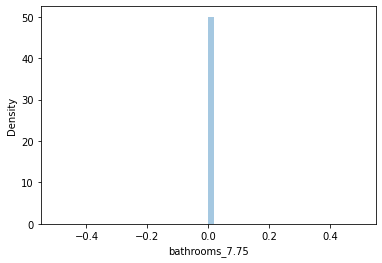

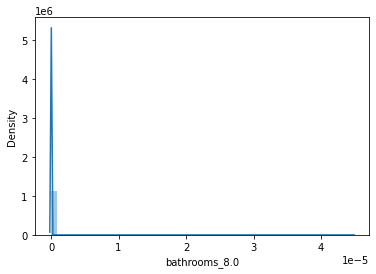

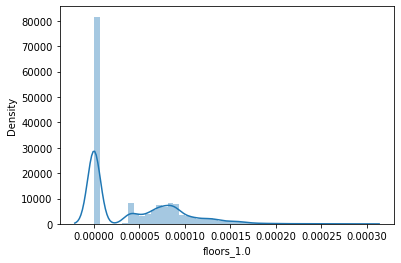

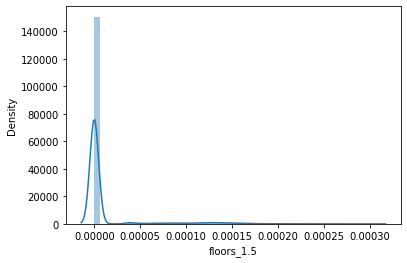

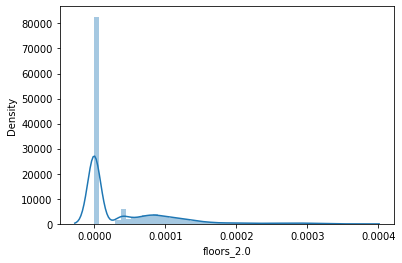

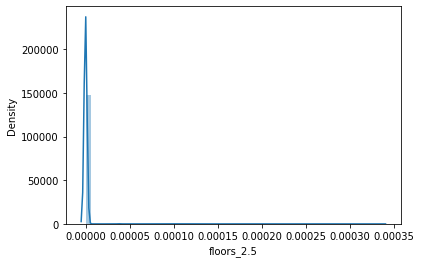

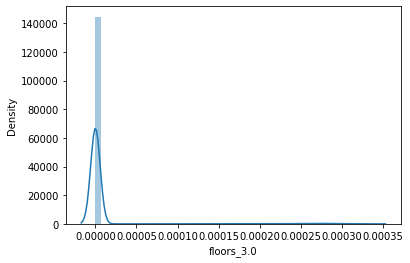

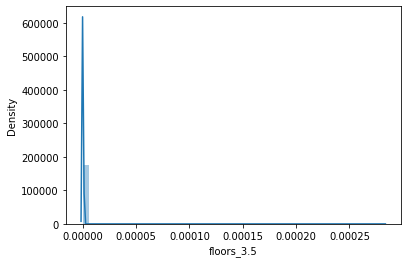

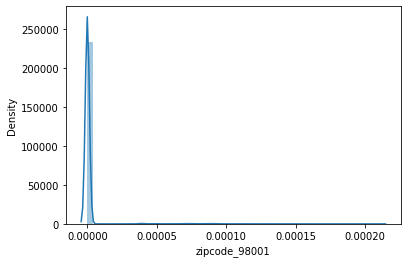

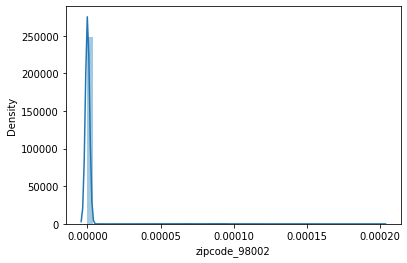

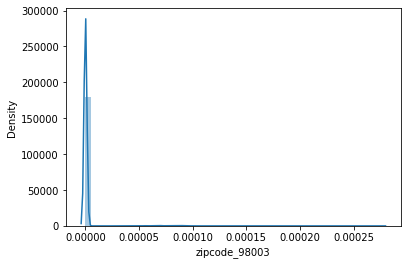

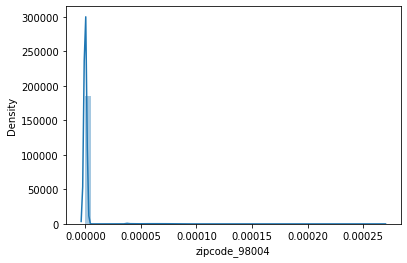

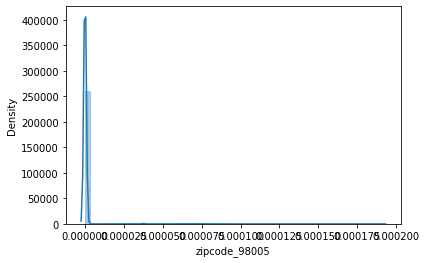

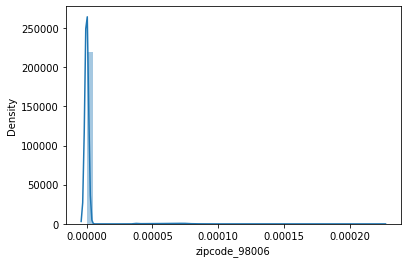

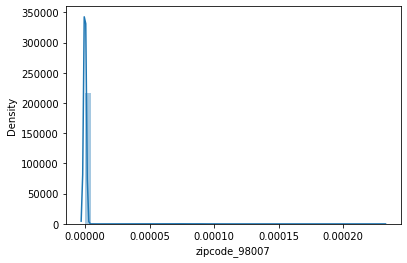

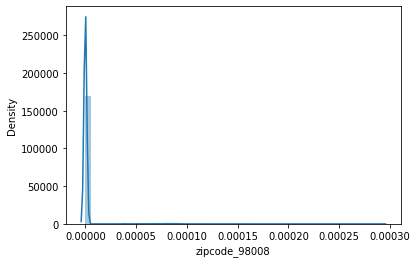

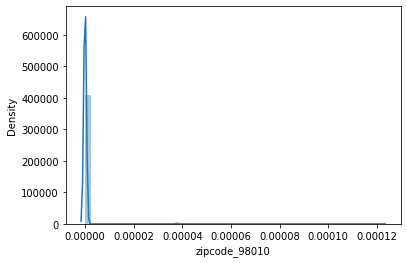

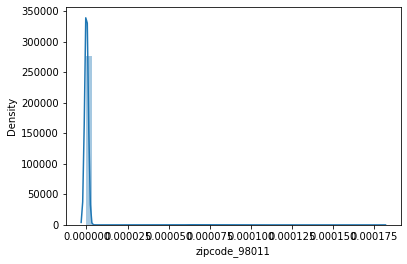

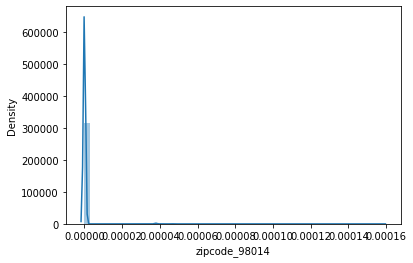

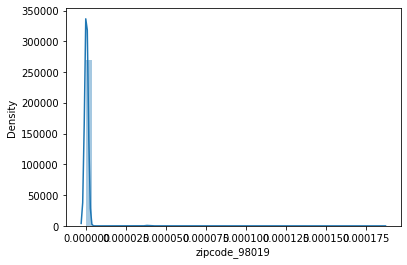

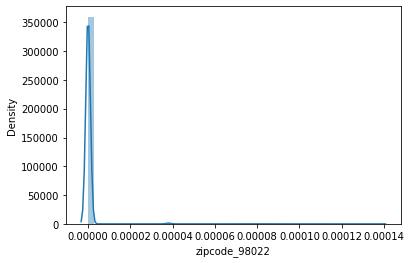

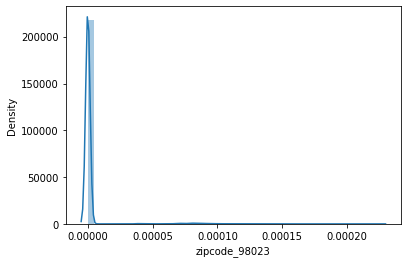

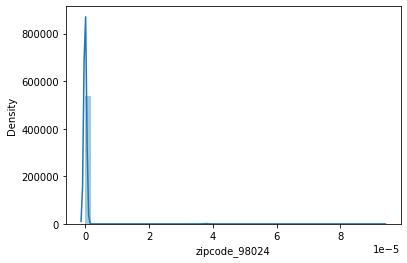

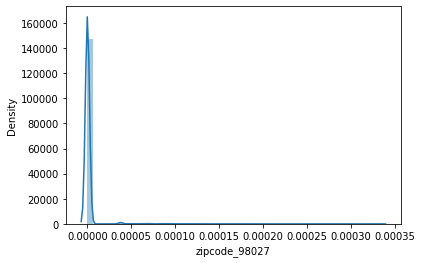

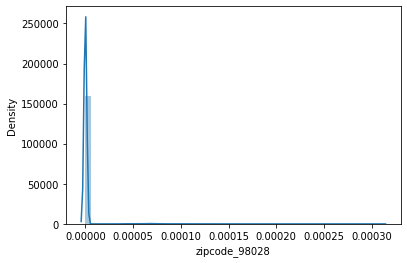

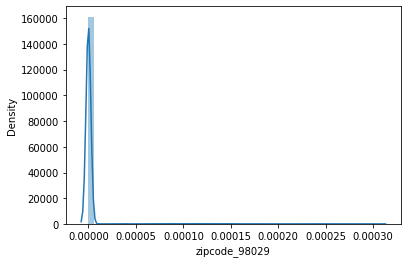

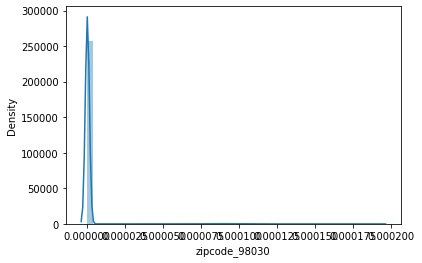

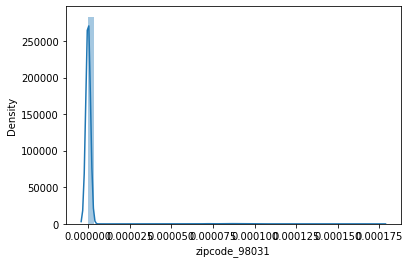

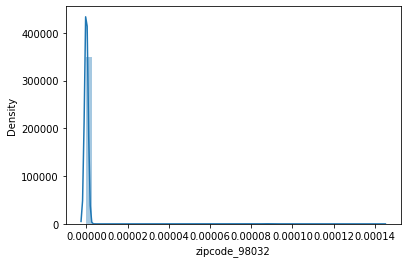

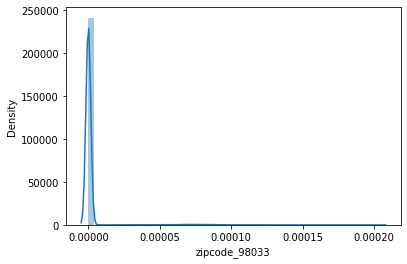

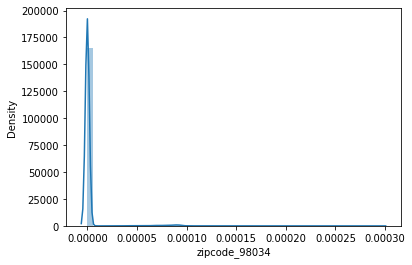

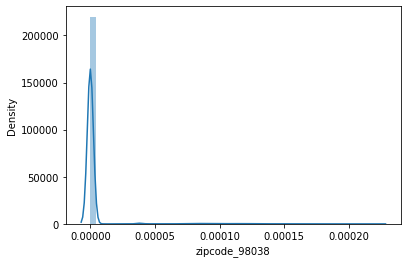

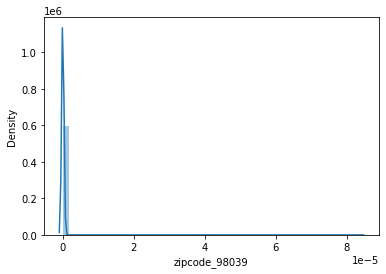

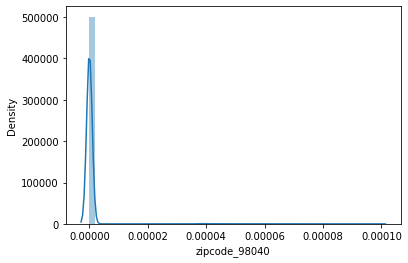

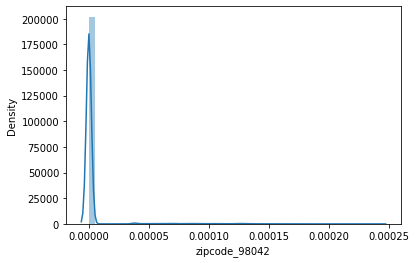

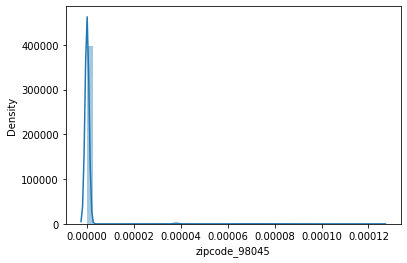

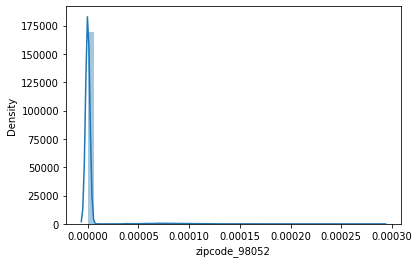

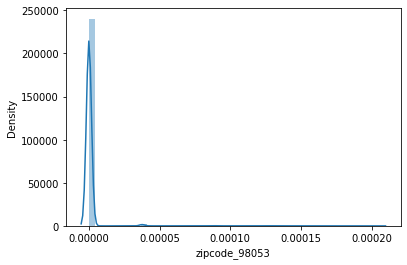

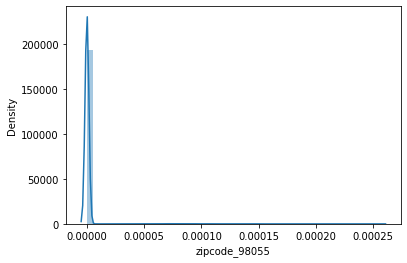

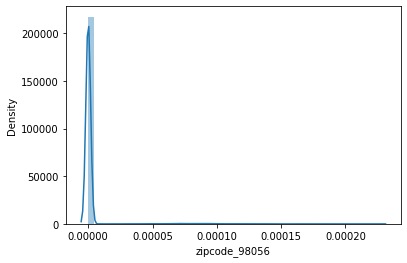

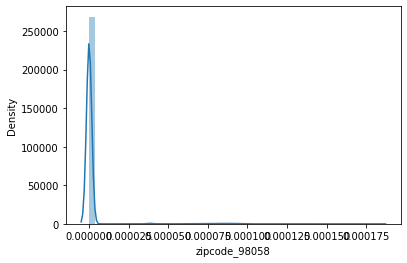

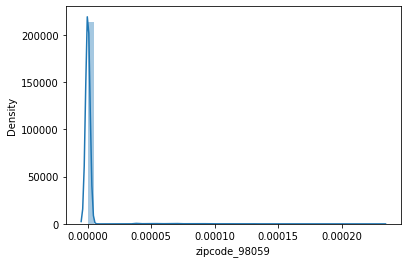

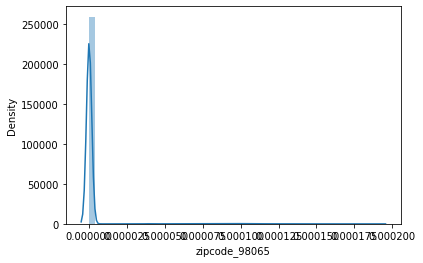

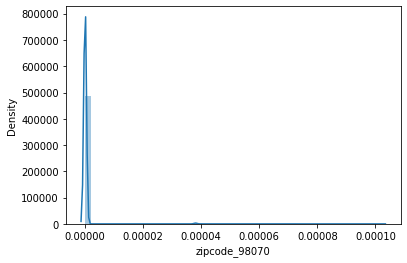

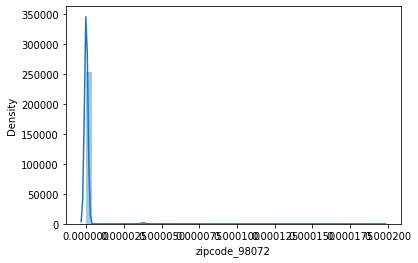

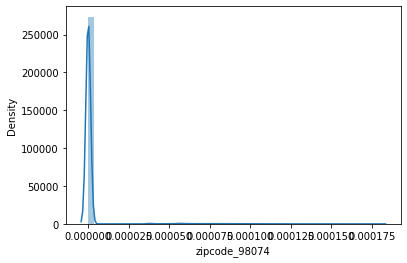

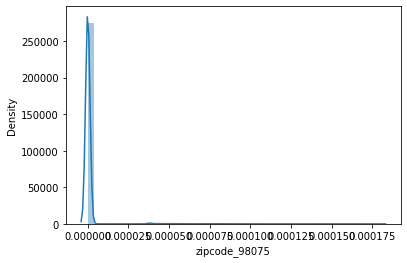

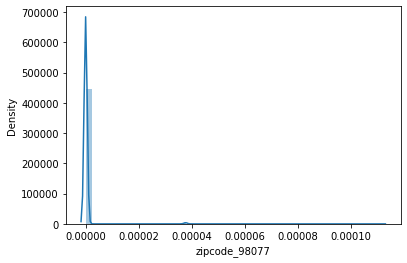

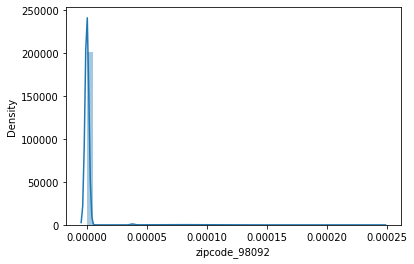

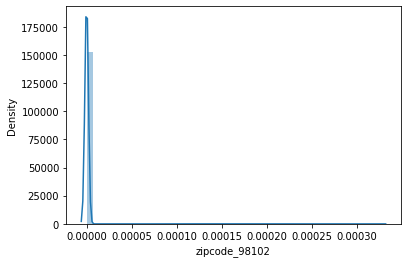

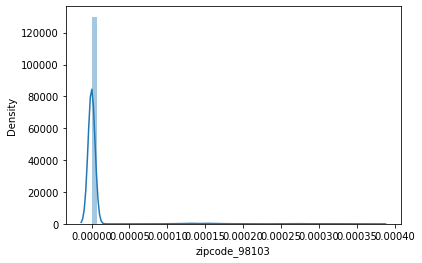

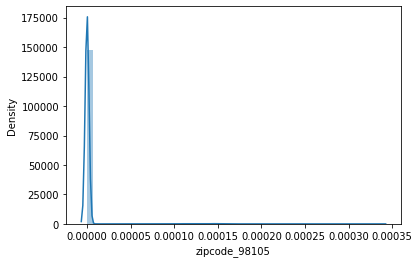

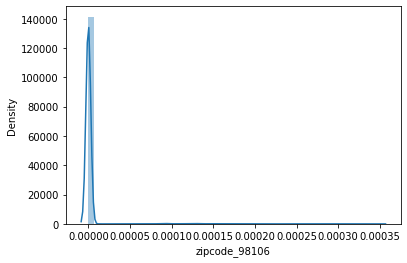

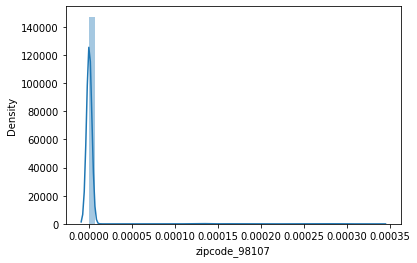

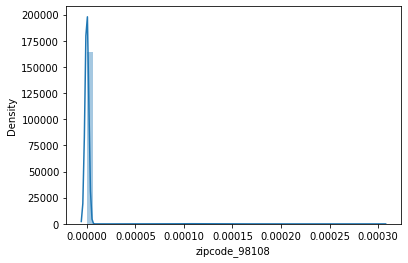

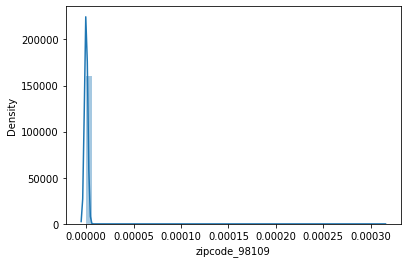

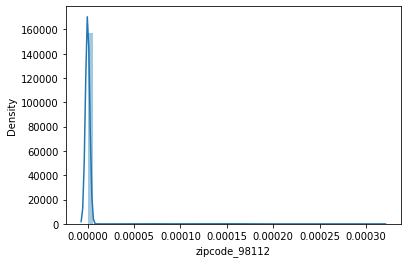

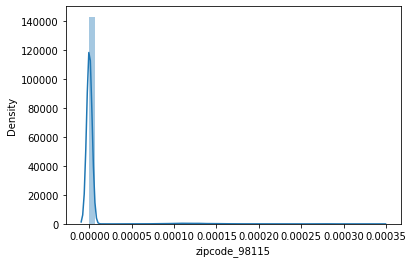

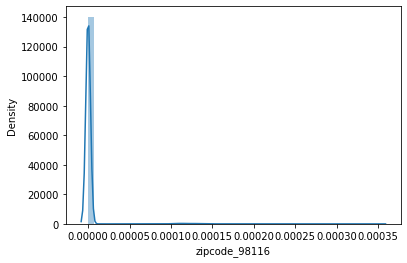

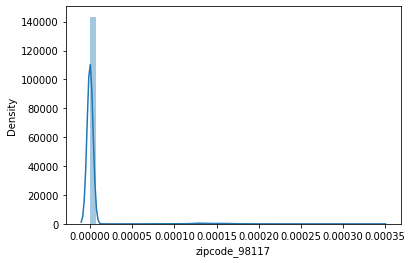

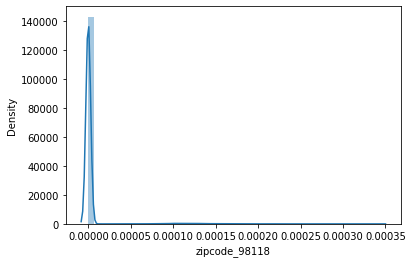

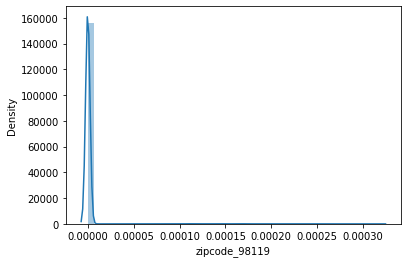

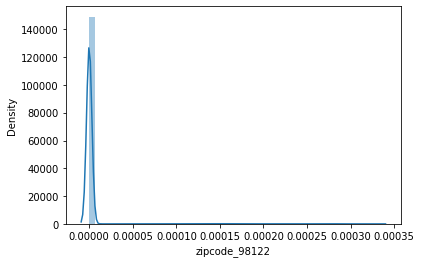

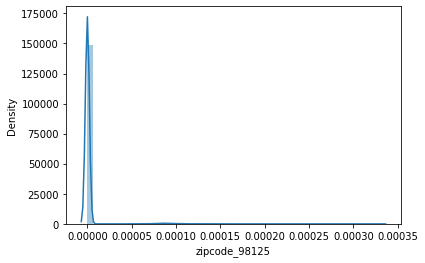

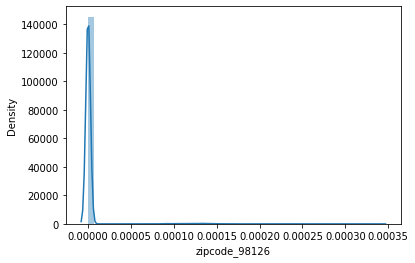

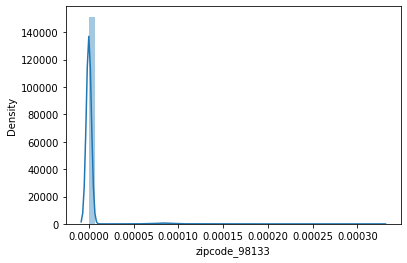

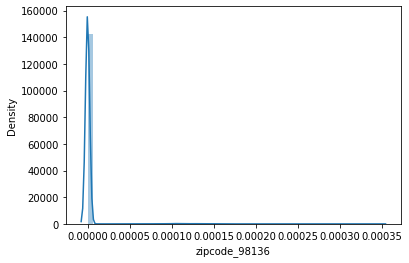

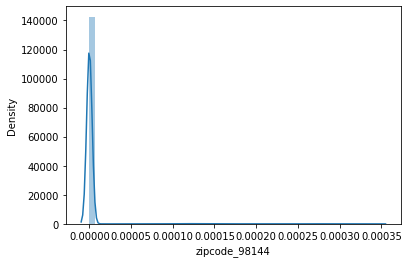

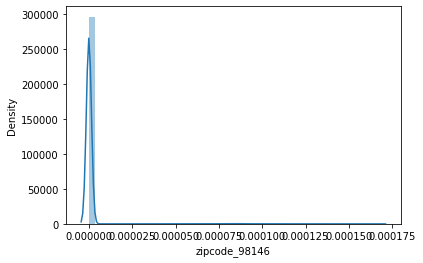

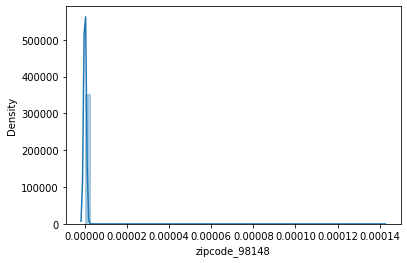

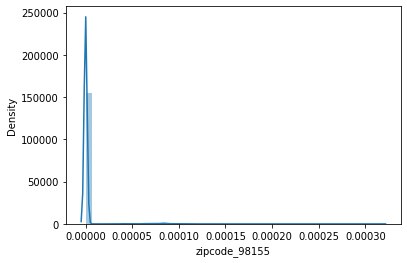

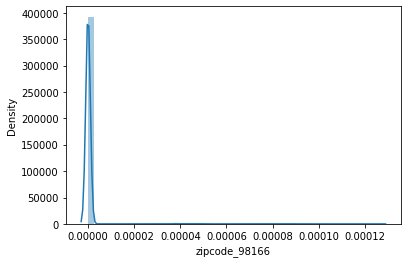

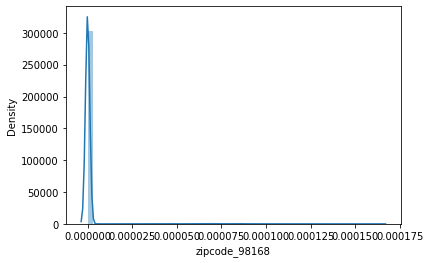

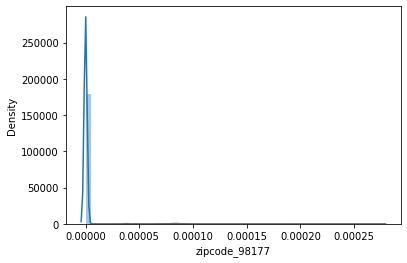

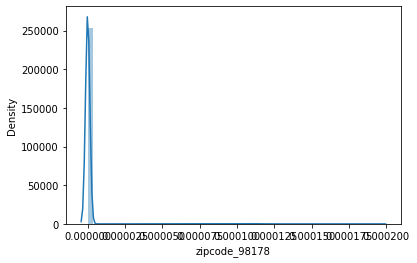

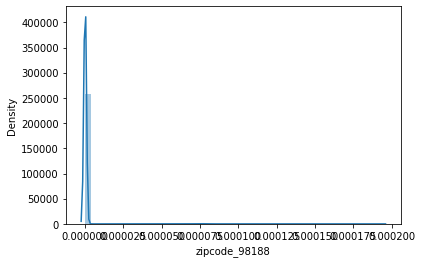

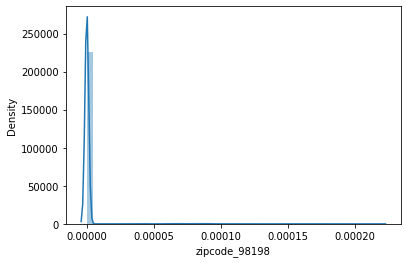

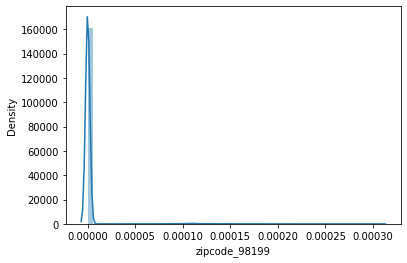

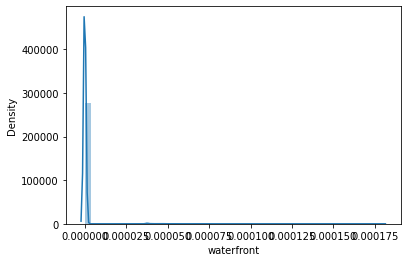

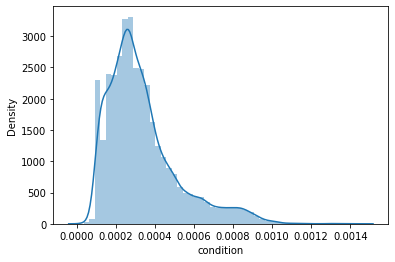

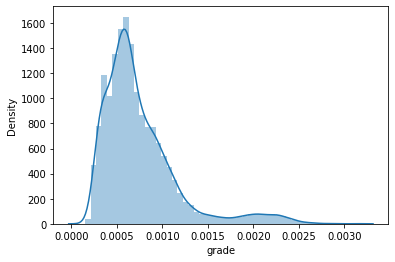

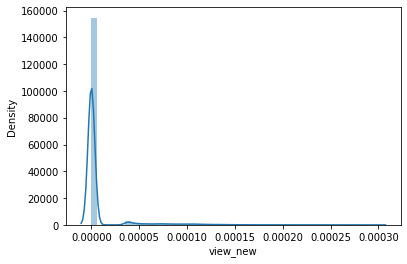

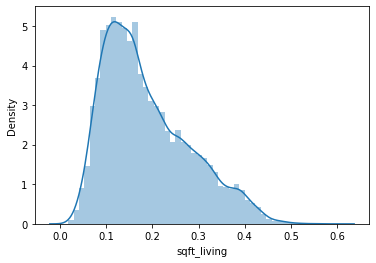

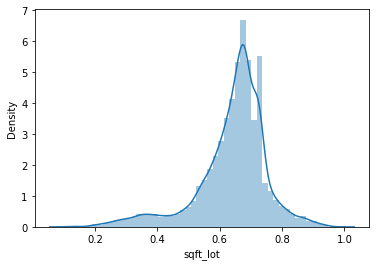

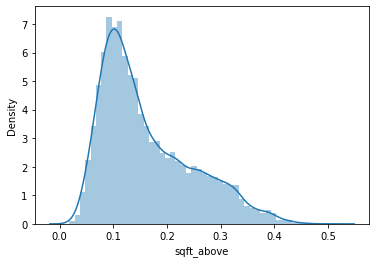

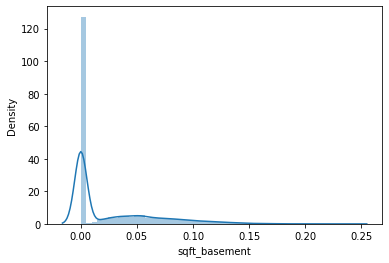

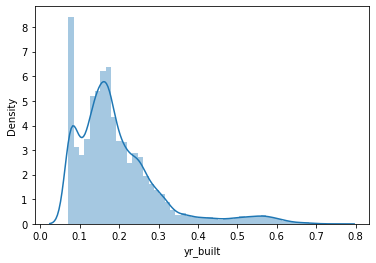

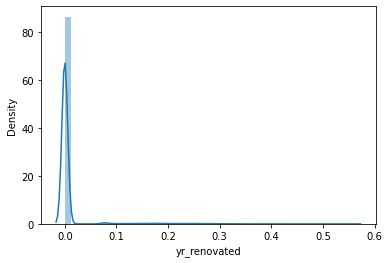

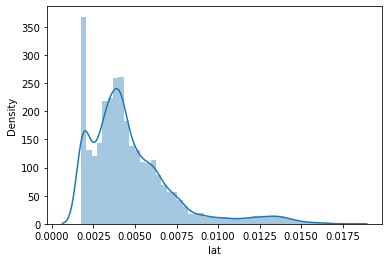

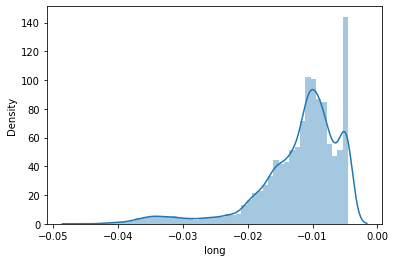

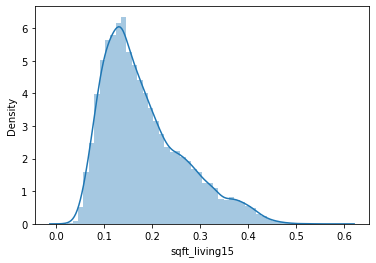

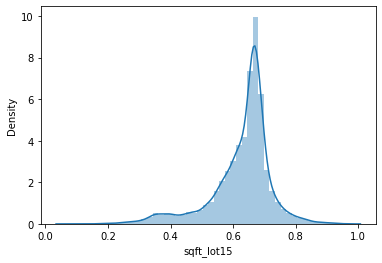

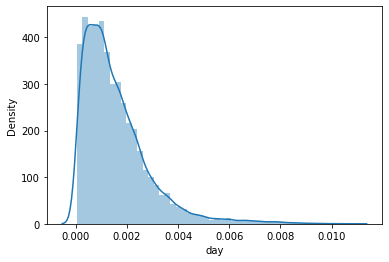

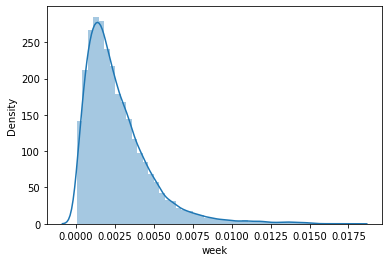

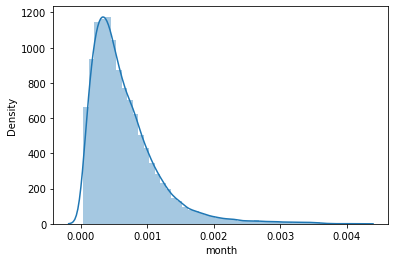

In [57]:
funct.Scalings(X_train, scaling_methods=[StandardScaler(),Normalizer()])

- StandardScaler() gives no real improvement of distributions of columns: 'sqft_living', 'sqft_lot','sqft_above','sqft_basement','lat', 'long','sqft_living15', 'sqft_lot15'

(&Yr_built, yr_renovated)

**- Normalizer() improves dsitributions of day, week, month, sqft_lot15,sqft_living15, long, lat**

#### Test Boxcox on copy of X_train

In [58]:
X_train_boxcox = X_train.copy()

In [59]:
#check boxcox
def boxcox_transform(data, in_columns=[]):
    _ci = {column: None for column in data.columns}
    for col in data:
        if col in in_columns:
            data[col] = np.where(data[col]<=0, np.NAN, data[col]) 
            data[col] = data[col].fillna(data[col].mean())
            transformed_data, ci = stats.boxcox(data[col])
            data[col] = transformed_data
            _ci[col] = [ci] 
            return data, _ci

#num_boxcox, _ci = boxcox_transform(num_boxcox)

In [60]:
X_train_boxcox, _ci = boxcox_transform(X_train_boxcox, in_columns=['day','week','month','sqft_living', 'sqft_lot','sqft_above','sqft_basement','lat', 'long','sqft_living15', 'sqft_lot15'])

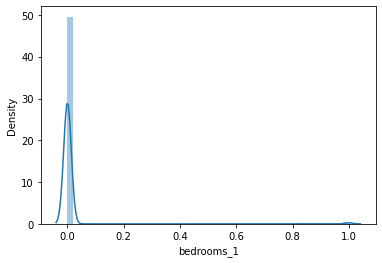

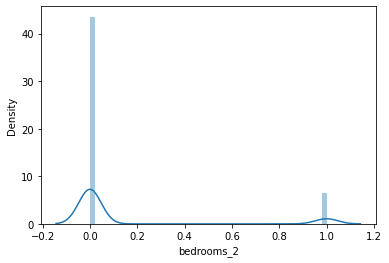

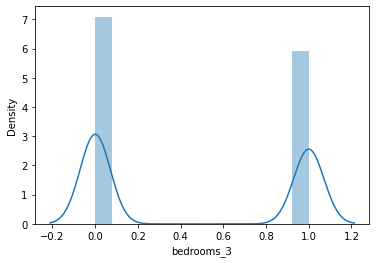

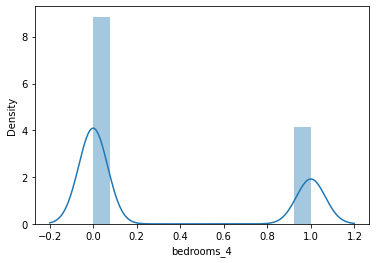

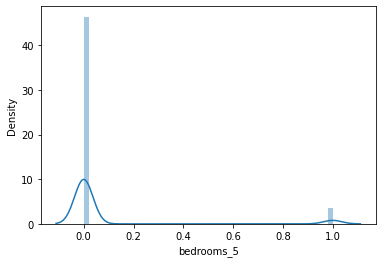

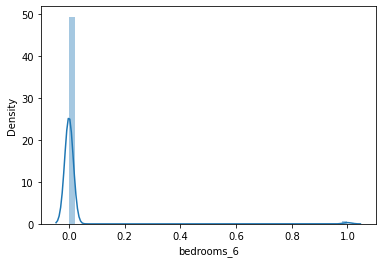

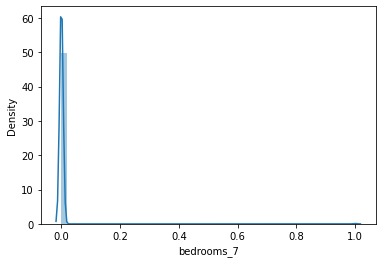

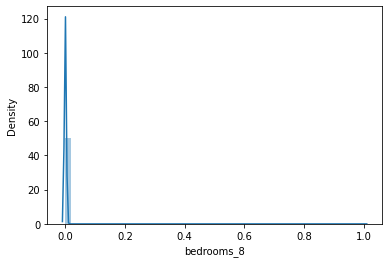

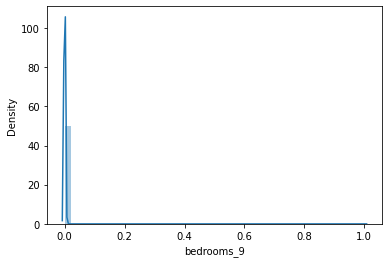

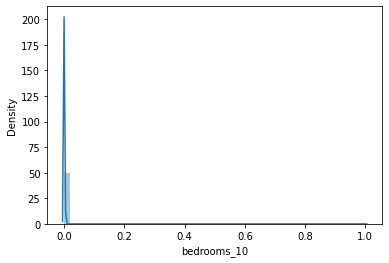

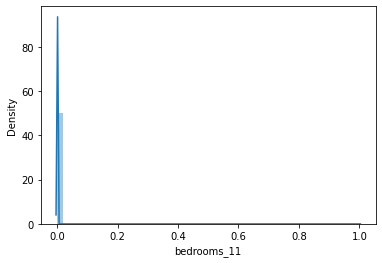

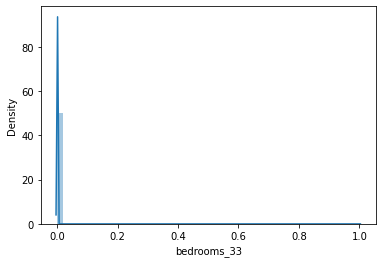

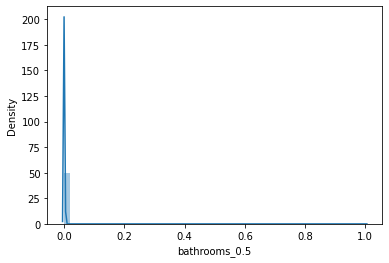

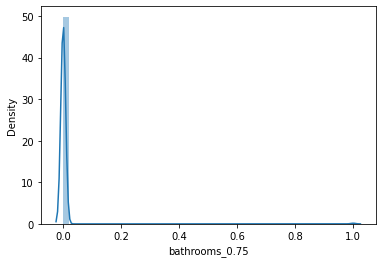

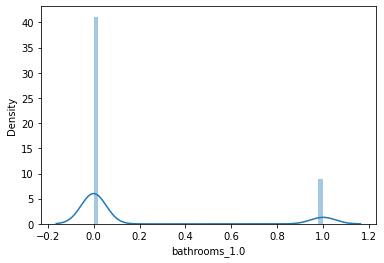

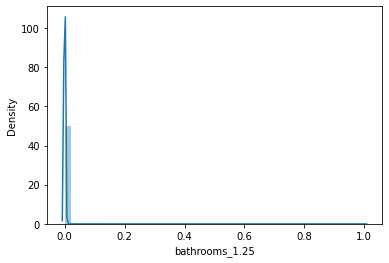

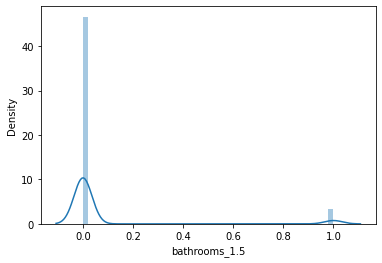

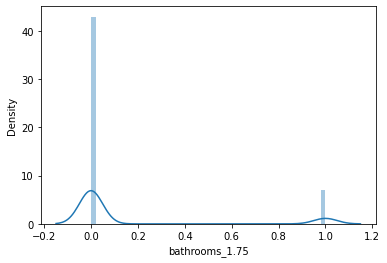

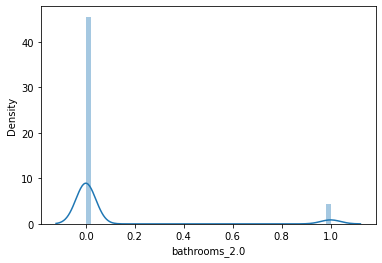

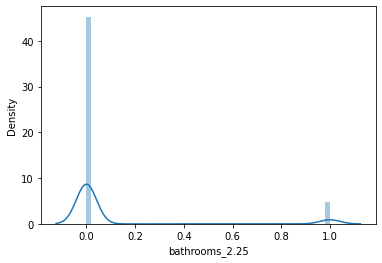

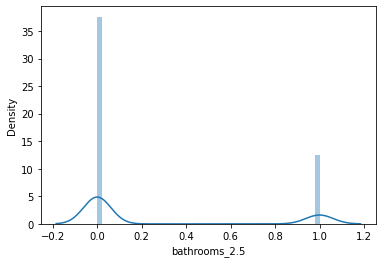

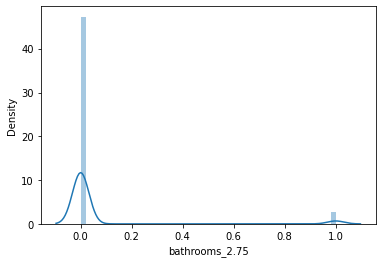

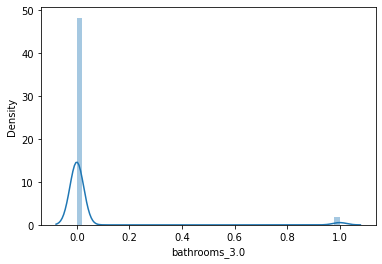

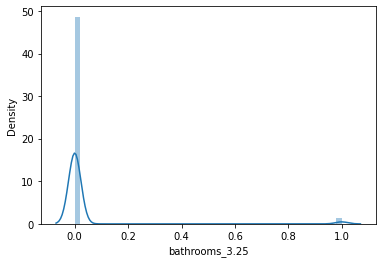

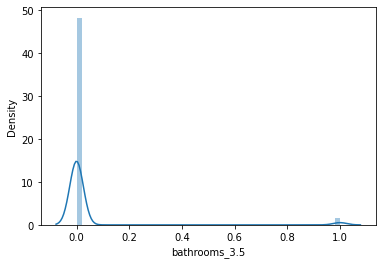

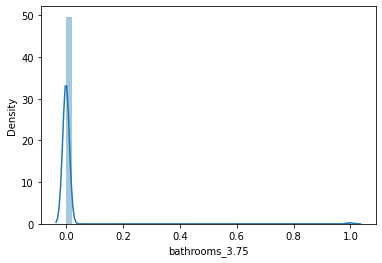

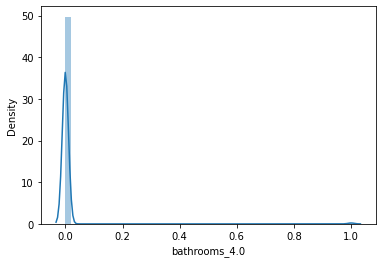

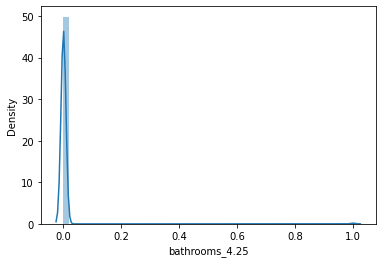

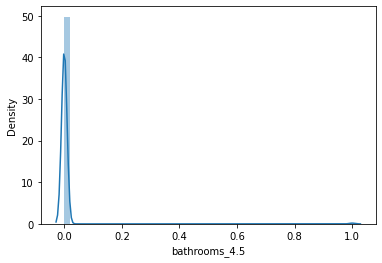

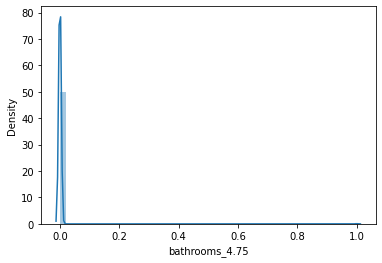

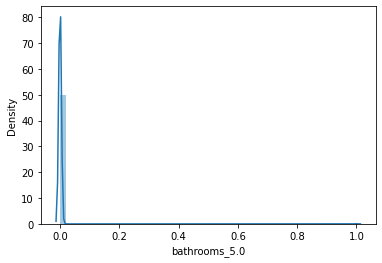

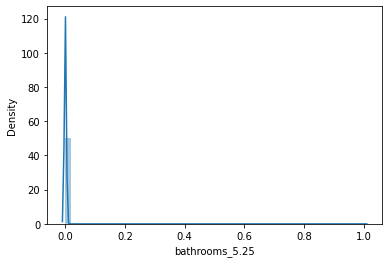

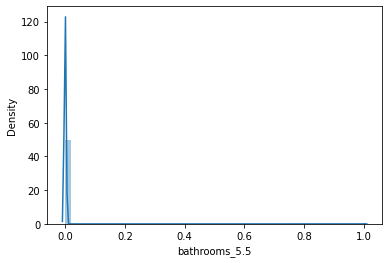

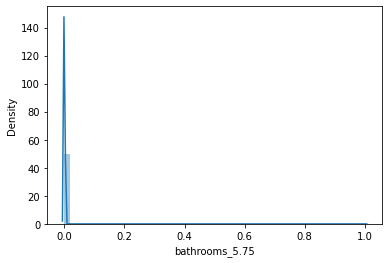

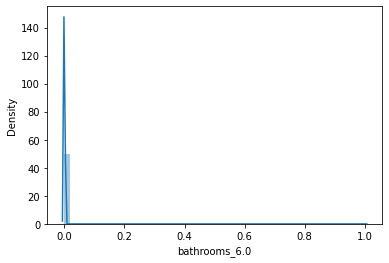

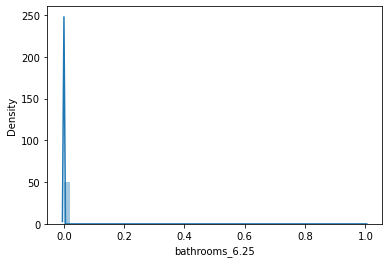

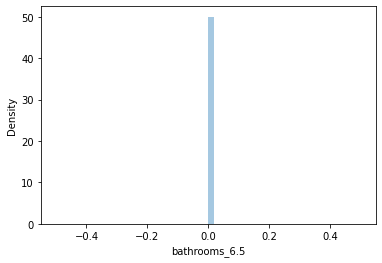

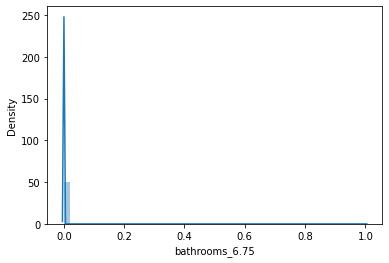

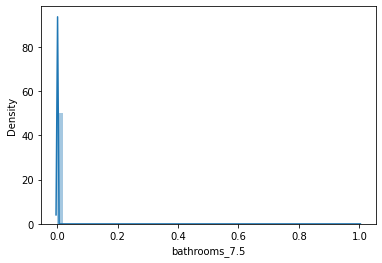

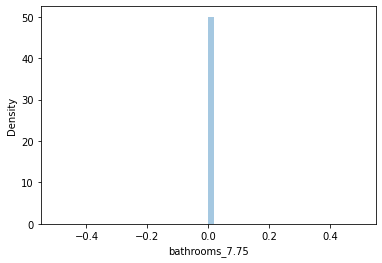

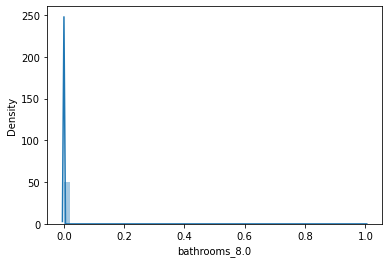

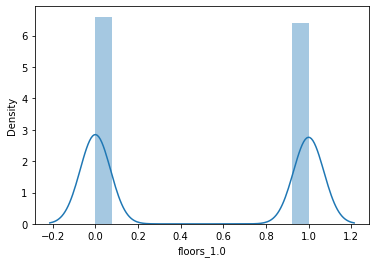

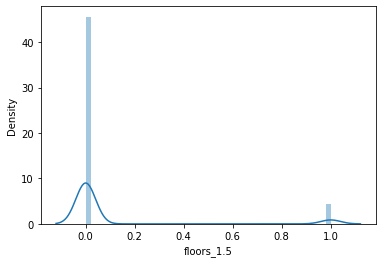

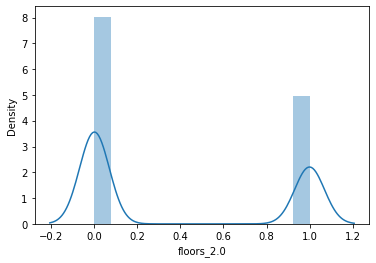

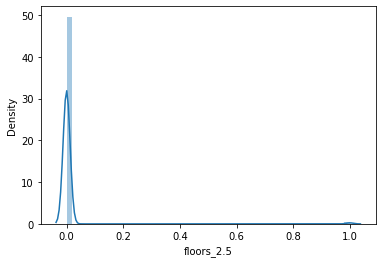

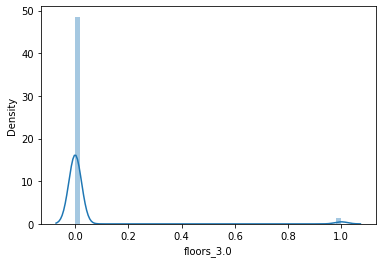

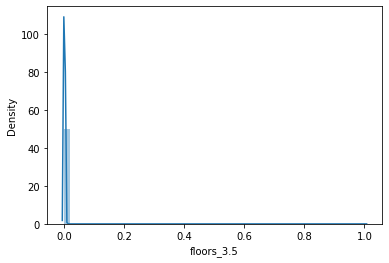

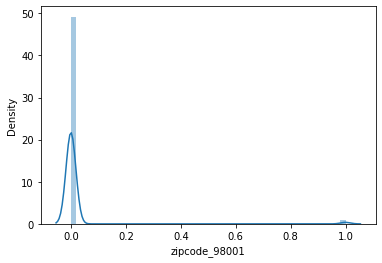

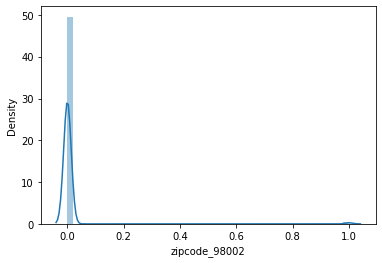

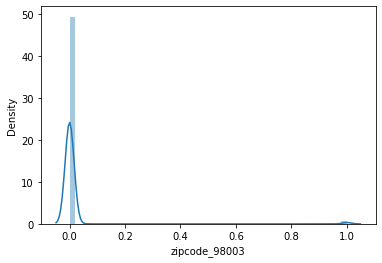

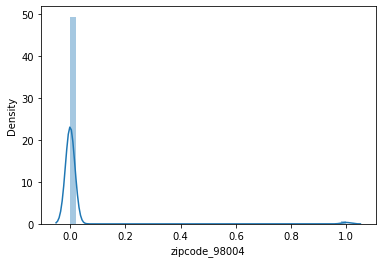

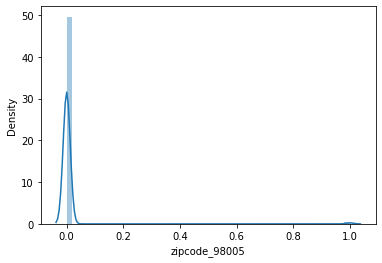

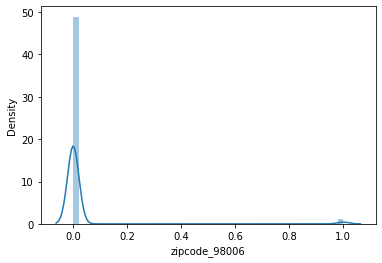

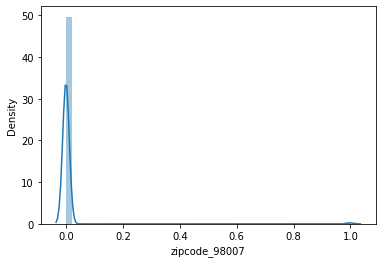

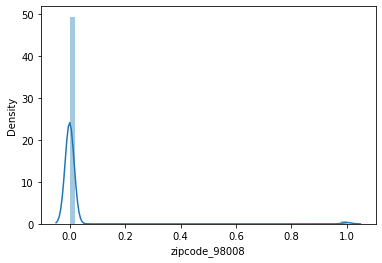

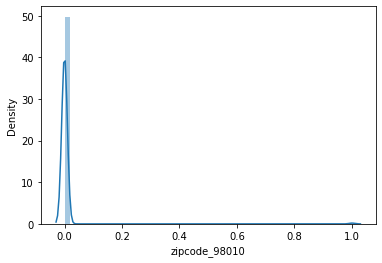

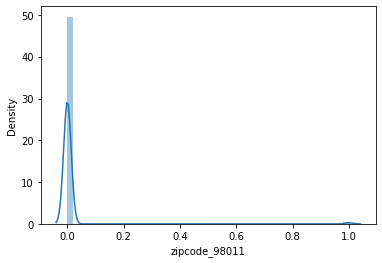

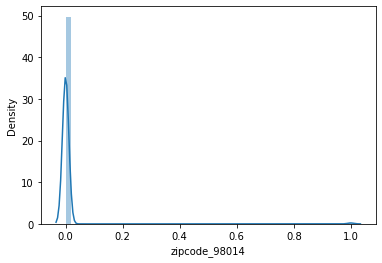

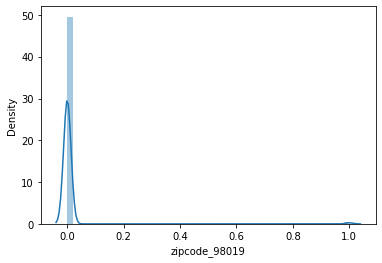

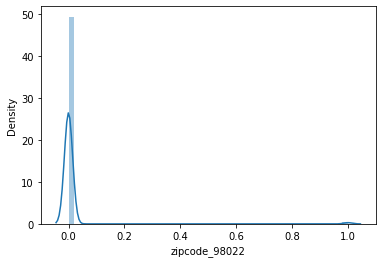

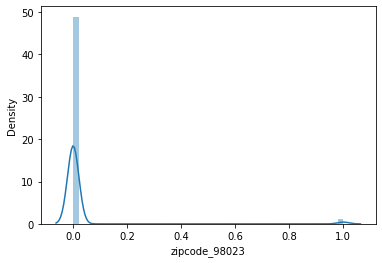

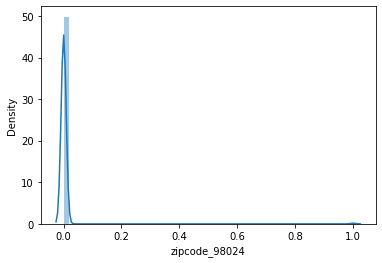

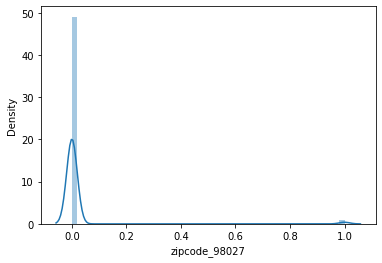

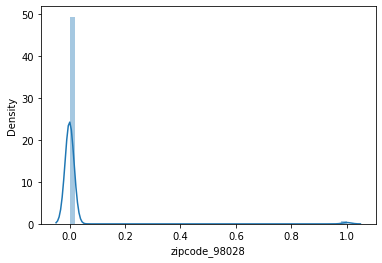

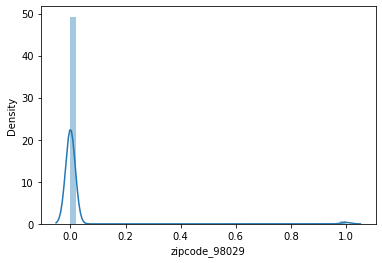

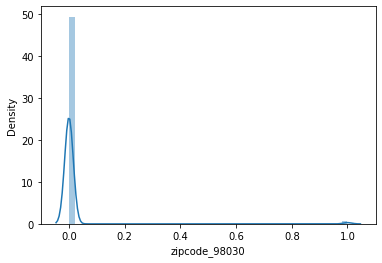

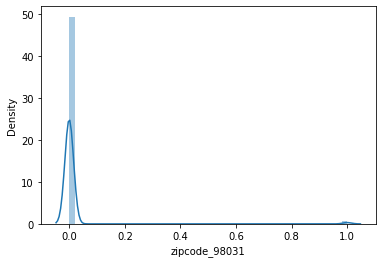

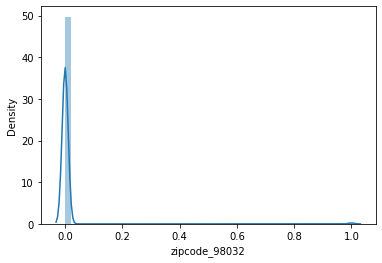

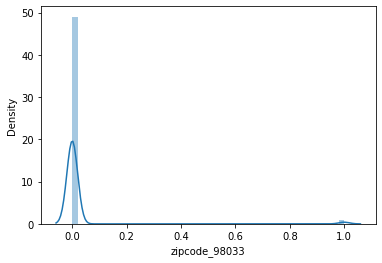

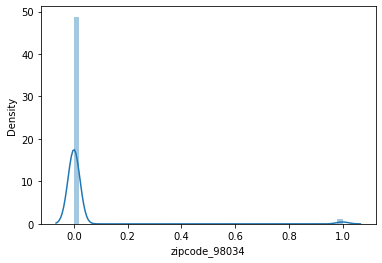

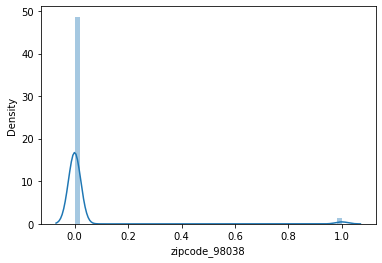

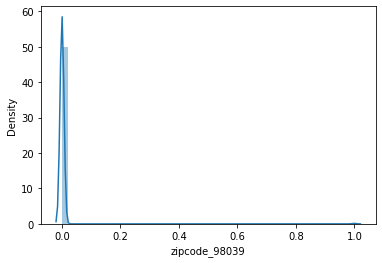

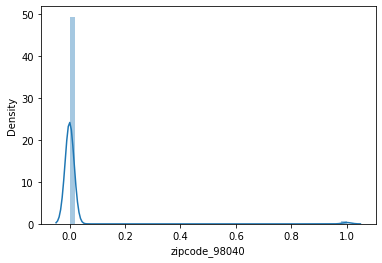

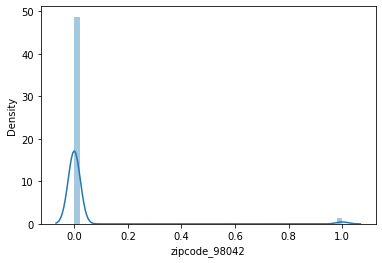

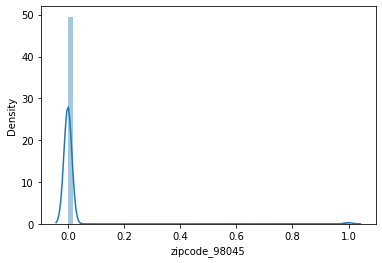

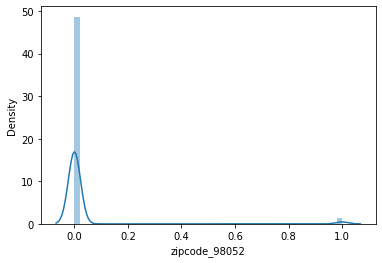

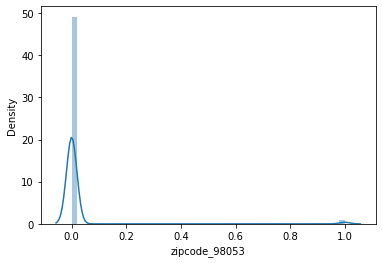

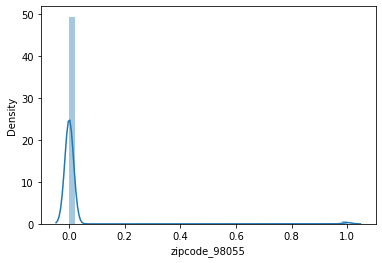

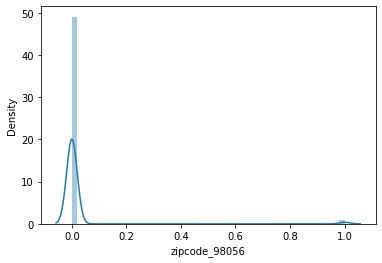

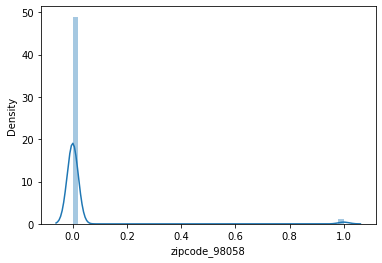

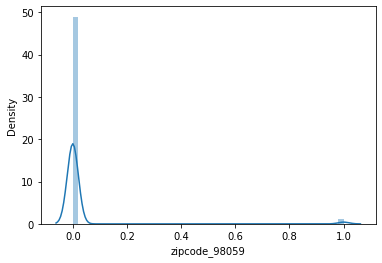

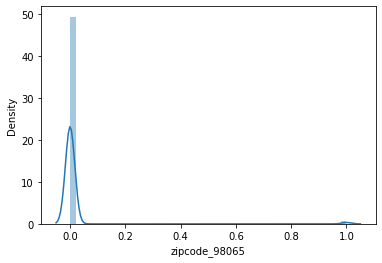

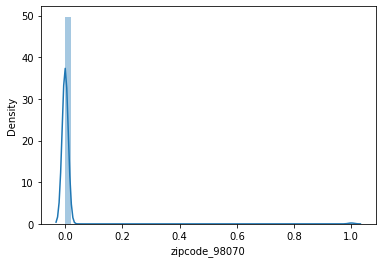

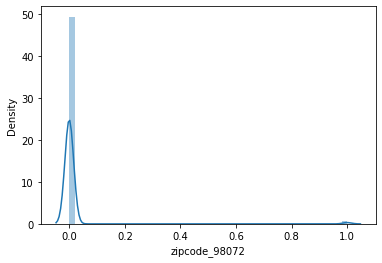

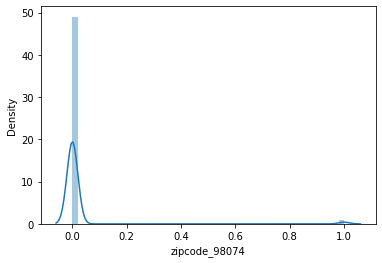

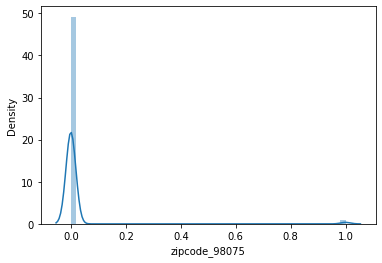

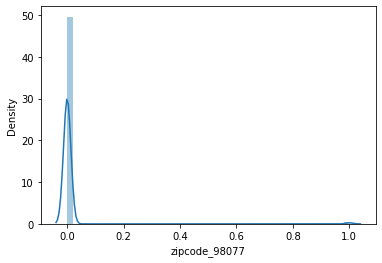

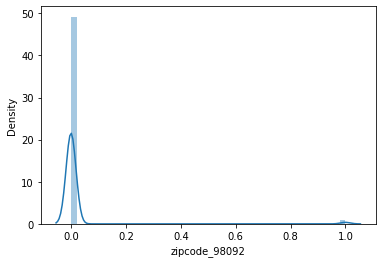

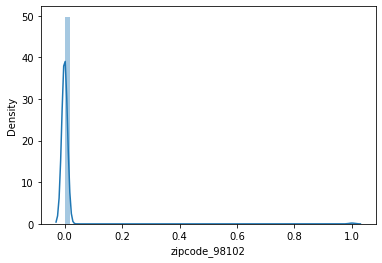

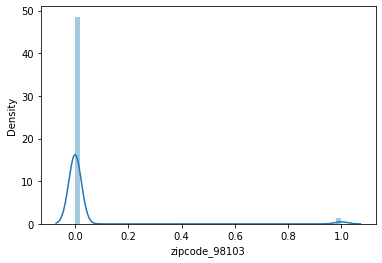

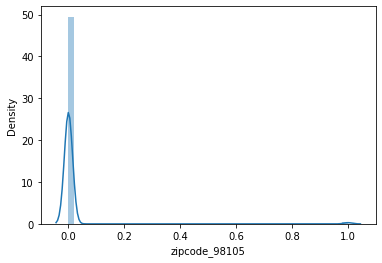

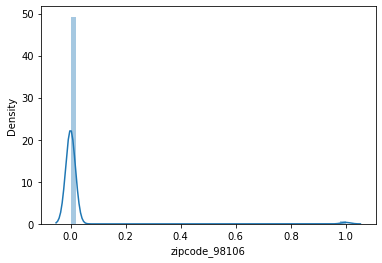

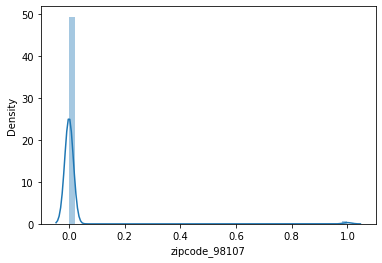

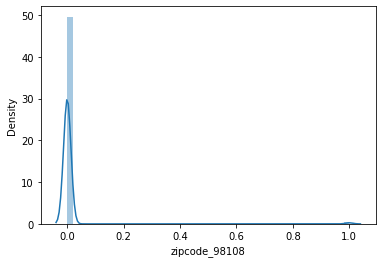

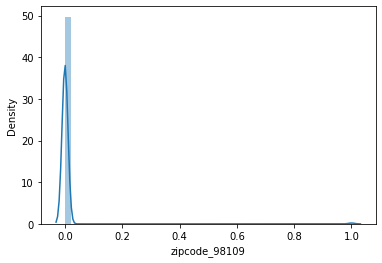

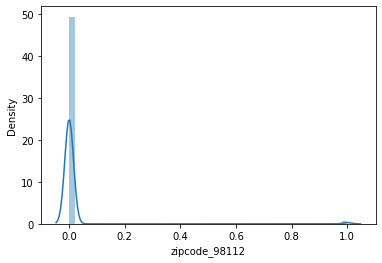

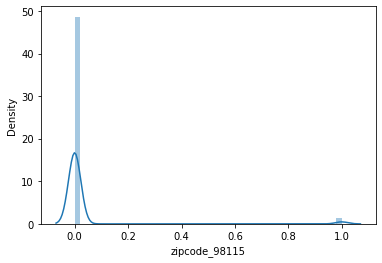

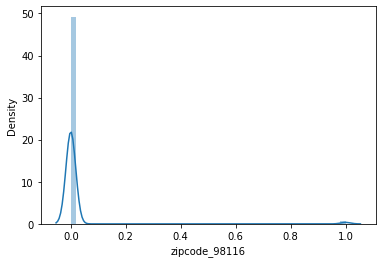

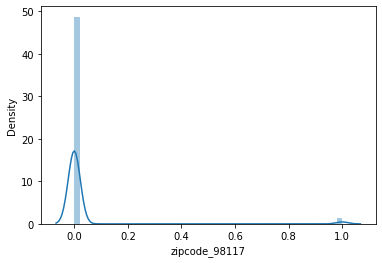

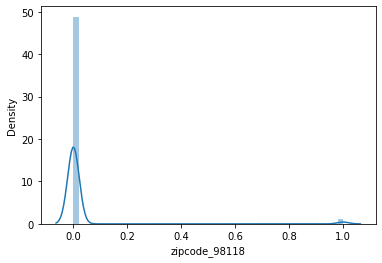

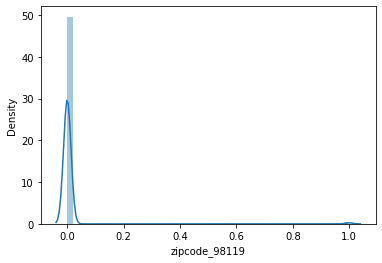

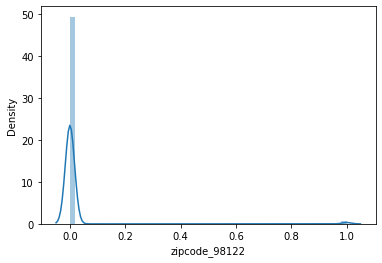

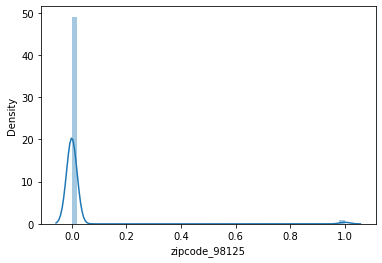

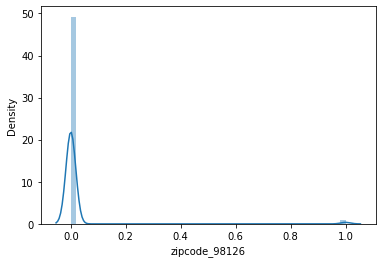

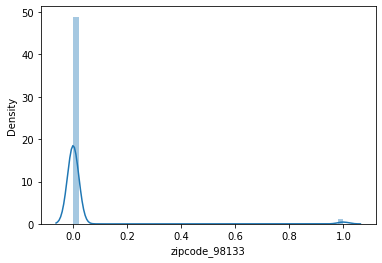

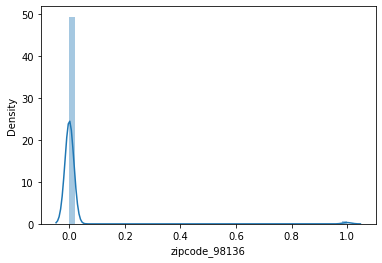

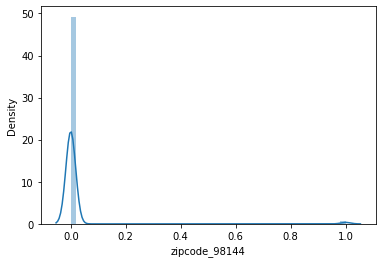

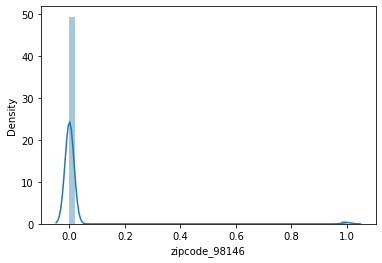

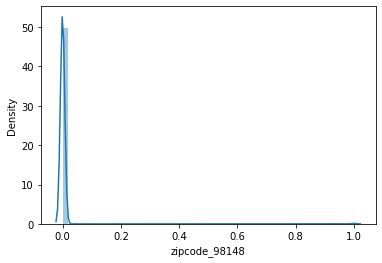

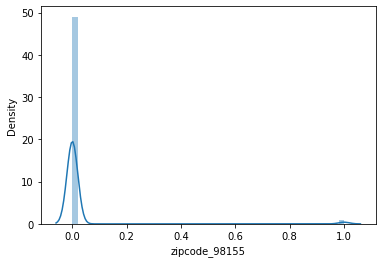

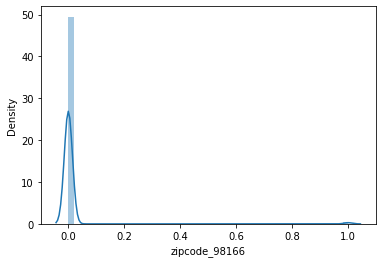

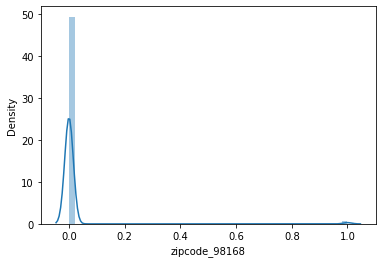

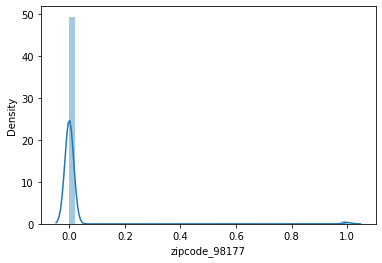

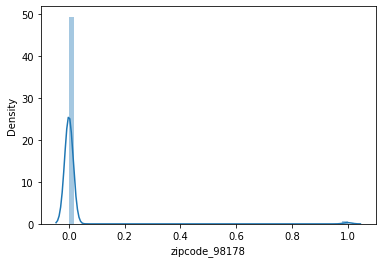

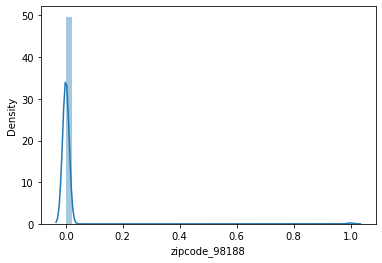

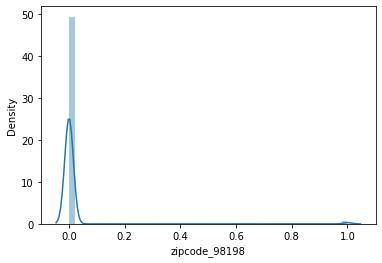

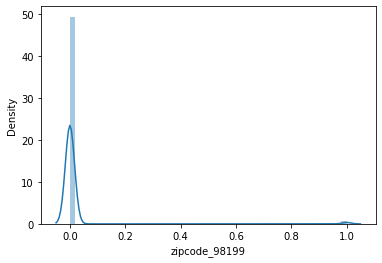

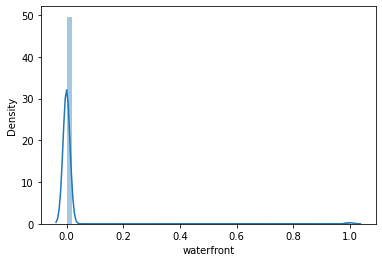

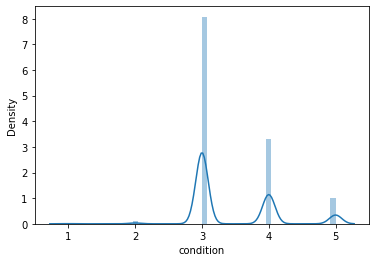

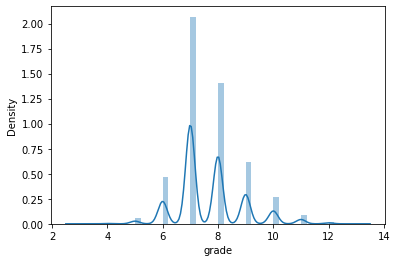

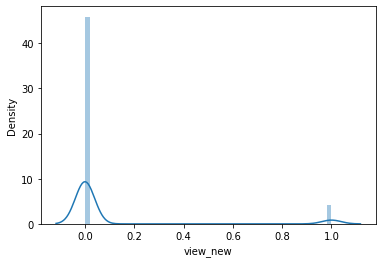

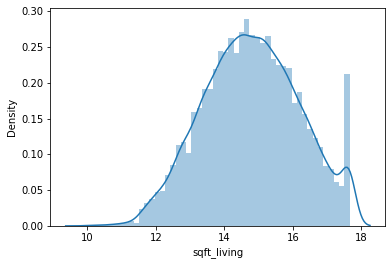

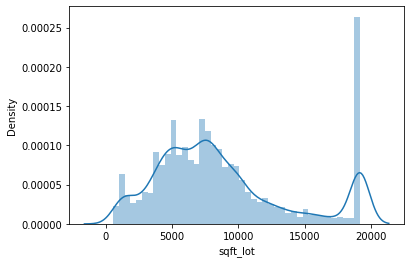

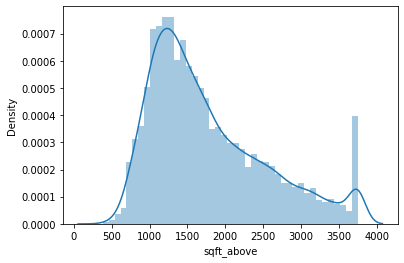

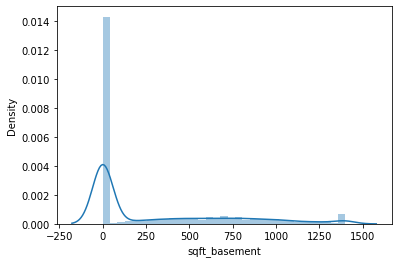

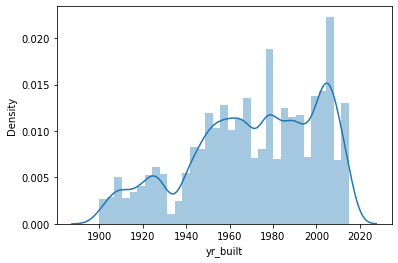

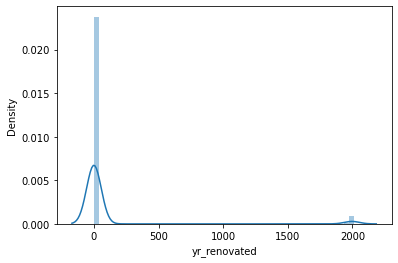

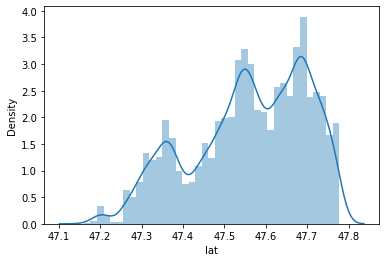

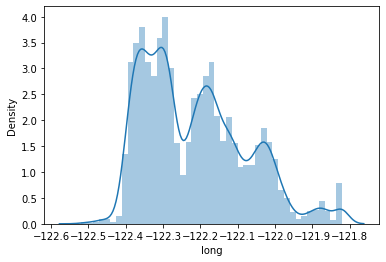

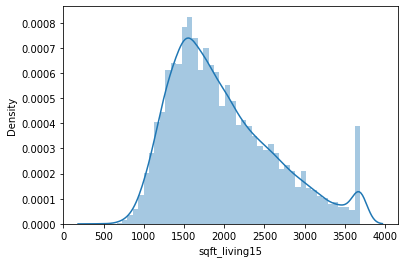

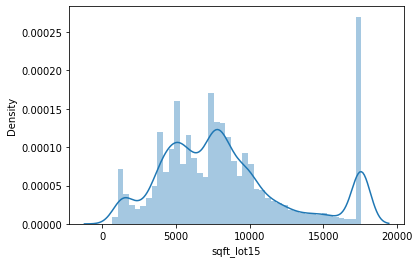

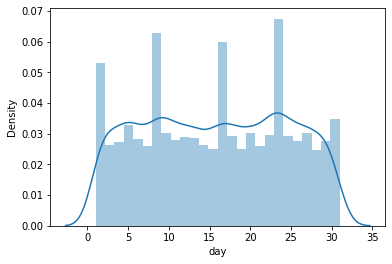

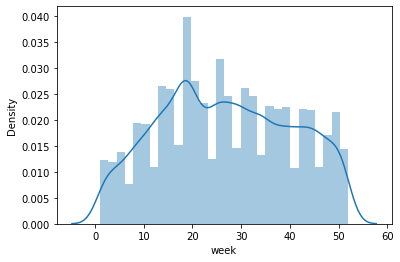

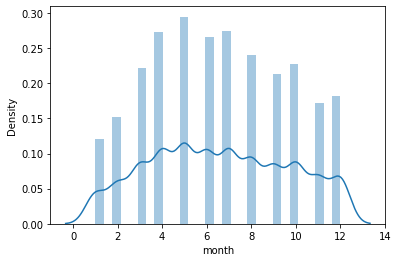

In [61]:
for col in X_train_boxcox.columns:
        sns.distplot(X_train_boxcox[col])
        plt.show()


**- Improves the distribution of Sqft living** 

#### Save Normalizer and BoxCox of single columns to a pickle

In [ ]:
transformer = ...

# saving in a pickle
with open('std_transformer.pickle', 'wb') as file:
    pickle.dump(transformer, file)
    
# loading from a pickle  
with open('std_transformer.pickle', 'rb') as file:
    loaded_transformer = pickle.load(file)

## Perform Regression Models

### Apply transformer to test set

### Linear Regression

In [63]:
lreg = LinearRegression()
lreg.fit(X_train, y_train)

LinearRegression()

In [64]:
lreg.score(X_test, y_test)

0.866023224802647

In [65]:
predictions = lreg.predict(X_test)
r2_score(y_test, predictions), mean_absolute_error(y_test, predictions), mean_squared_error(y_test, predictions)

(0.866023224802647, 67470.1395870681, 8435830257.397719)

**Good R2 score: 0.86, but investigate mean absolute error (70k), could maybe revised and improved.** 

In [66]:
compare = pd.DataFrame({'Prediction': predictions, 'Test Data' : y_test})
compare.head(10)

Prediction  Test Data
12889  3.215555e+05   374950.0
10577  2.979144e+05   325000.0
16673  4.337966e+05   396000.0
7285   6.177621e+05   465000.0
9717   2.913398e+05   272000.0
13947  7.300391e+05   695000.0
2550   3.698262e+05   313000.0
15145  4.067332e+05   310000.0
924    7.541734e+05   990000.0
15244  1.276284e+06  1128750.0

### KNN Regressor

In [67]:
from sklearn.neighbors import KNeighborsRegressor

#### Check for appropriate k value

In [68]:
scores = []
for i in range(2,15):
    model = KNeighborsRegressor(n_neighbors=i)
    model.fit(X_train, y_train)
    scores.append(model.score(X_test, y_test))

Text(0, 0.5, 'Accuracy')

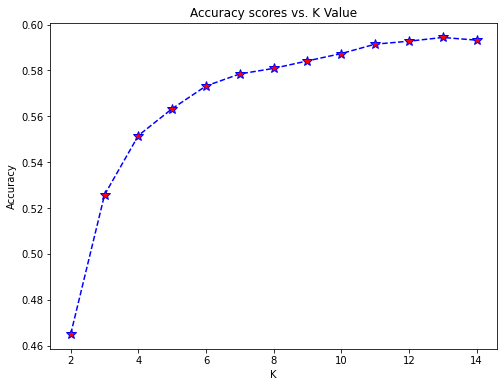

In [69]:
plt.figure(figsize=(8,6))
plt.plot(range(2,15),scores,color = 'blue', linestyle='dashed',
         marker='*', markerfacecolor='red', markersize=10)
plt.title('Accuracy scores vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy')

Choose: K = 8 to balance accuracy and performance

#### Check Results

In [74]:
model = KNeighborsRegressor(n_neighbors=7)
model.fit(X_train, y_train)
R2score = model.score(X_test, y_test)
print(model,":",R2score)

KNeighborsRegressor(n_neighbors=7) : 0.5784842960212679


In [76]:
predictionsk = model.predict(X_test)
r2_score(y_test, predictionsk), mean_absolute_error(y_test, predictionsk), mean_squared_error(y_test, predictionsk)

(0.5784842960212679, 124525.86654661865, 26540681579.73056)

In [77]:
compare = pd.DataFrame({'Prediction': predictionsk, 'Test Data' : y_test})
compare.head(10)

Prediction  Test Data
12889  379571.428571   374950.0
10577  387457.142857   325000.0
16673  417300.000000   396000.0
7285   581640.428571   465000.0
9717   399571.428571   272000.0
13947  689028.571429   695000.0
2550   591371.428571   313000.0
15145  430785.714286   310000.0
924    742078.571429   990000.0
15244  861357.142857  1128750.0

Predictions look way better; valid mean absolute error.

### MLP Regressor

In [78]:
from sklearn.neural_network import MLPRegressor

In [80]:
modelm = MLPRegressor()
modelm.fit(X_train, y_train)
R2score = modelm.score(X_test, y_test)
print(modelm,":",R2score)

MLPRegressor() : 0.5852167451574342


In [81]:
predictionsm = modelm.predict(X_test)
r2_score(y_test, predictionsm), mean_absolute_error(y_test, predictionsm), mean_squared_error(y_test, predictionsm)

(0.5852167451574342, 127339.5152373795, 26116773793.88034)

In [82]:
compare = pd.DataFrame({'Prediction': predictionsm, 'Test Data' : y_test})
compare.head(10)

Prediction  Test Data
12889  429480.028928   374950.0
10577  350481.606297   325000.0
16673  301839.709006   396000.0
7285   655131.695299   465000.0
9717   494199.748192   272000.0
13947  698790.371031   695000.0
2550   592595.458315   313000.0
15145  541299.261475   310000.0
924    681623.583358   990000.0
15244  927211.004038  1128750.0